### Imports

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

%matplotlib inline 
mpl.rcParams['figure.dpi'] = 300

In [3]:
from sklearn.preprocessing import Normalizer

In [4]:
from chart_studio import plotly
import plotly.figure_factory as ff

In [5]:
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 4000

In [6]:
DATA_VERSION = 'v4'

In [ ]:
fig_dir = '../' + DATA_VERSION + '-fig/fig-courts/SCCS/'

In [7]:
gov_arch_csv = '../data/' + DATA_VERSION + '/communities_data_prepped.csv'

In [8]:
gov_df = pd.read_csv(gov_arch_csv)

In [9]:
gov_df.head()

Name                                       Institutions  \
0  Aedui (Celtic Oppida)             Senatus,Elected magistrates,Assemblies   
1                   Akha  Council of Elders,Village Founder-Leader (dzom...   
2                 Amalfi  Prefetturii/ Conti/ Dogi,Sedile di congrega,Ta...   
3            Arab nomads                 shaykh or sayyid,shura or mashwara   
4                  Assur                  King,Alum,Limmum,Scribe,City hall   

                                           Mechanism  \
0  Election,Council (central) ,Assembly (central)...   
1  Leader (first among equals),Gerontocracy,Blood...   
2  Election,Magistrate/official,Heredity,Constitu...   
3  Consensus,Consultation,Autocratic Leader/Chief...   
4  President/Consul/Chief Executive,Assembly (cen...   

                                               Notes  \
0  There are many Celtic oppida throughout northe...   
1                               see Institutions tab   
2  Camera, M, p. 29 ("La sua popolazione che nel ...   
3  Nomadic Bedouin society governed by rulers sel...   
4  Independent city-state. Constitutional monarch...   

                                           Time span  \
0                                 2nd-1st century BC   
1                             20th century - Present   
2                                4th-12th century AD   
3  1st-7th century AD\n(start date is arbitrary, ...   
4                    19th century BC\n(1920-1800 BC)   

                    Geography                 Size  \
0                Europe North  100,001 - 1,000,000   
1             Asia Southeast      10,001 - 100,000   
2                 Europe West     10,001 - 100,000   
3                 Middle East              Unknown   
4  Europe Southeast, Anatolia       1,001 - 10,000   

                                              Source Metanotes  \
0  Collis, “Celtic” Oppida, in Hansen, A Comparat...       NaN   
1  Main: \nKammerer, Cornelia Ann (1985/86), Gate...       NaN   
2  Camera, M. Istoria della città e costiera di A...       NaN   
3  Stasavage, David (2020), The Decline and Rise ...       NaN   
4  Larsen, M. T. The Old Assyrian City-State in H...       NaN   

                                      Heterogeneity   \
0                                                NaN   
1  Informal inclusion,Gender groups,Informal powe...   
2                                                NaN   
3                                                NaN   
4                                                NaN   

                                         FC comments     expert check  \
0                                    Edited March 23              NaN   
1                                      Edited May 23              NaN   
2      Edited March 23 (could use more info on CGIs)              NaN   
3  Edited Feb 23 (could use additional sources fo...              NaN   
4                                      Edited Mar 23  Giacomo CHECKED   

   Time span: Start  Time span: End SCCS  is_SCCS  \
0            -200.0             0.0  NaN        0   
1            1900.0          2023.0  NaN        0   
2             300.0          1200.0  NaN        0   
3               0.0           700.0  NaN        0   
4           -1920.0         -1800.0  NaN        0   

   enforcement_mechanisms_include_jury_judge  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
4                                          0   

   access_mechanisms_include_life_appointment  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   enforcement_mechanisms_include_judicial_review  \
0                                               0   
1                          

# Courts Analysis 

In [10]:
col_list = list(gov_df.columns.values)
col_list

['Name',
 'Institutions',
 'Mechanism',
 'Notes',
 'Time span',
 'Geography',
 'Size',
 'Source',
 'Metanotes',
 'Heterogeneity ',
 'FC comments',
 'expert check',
 'Time span: Start',
 'Time span: End',
 'SCCS',
 'is_SCCS',
 'enforcement_mechanisms_include_jury_judge',
 'access_mechanisms_include_life_appointment',
 'enforcement_mechanisms_include_judicial_review',
 'decision_making_mechanisms_include_president_consul_chief_executive',
 'decision_making_mechanisms_include_secret_ballot',
 'access_mechanisms_include_patronage_for_office',
 'access_mechanisms_include_enfranchisement',
 'enforcement_mechanisms_include_tribunal_court_',
 'decision_making_mechanisms_include_magistrate_official',
 'enforcement_mechanisms_include_forced_labour',
 'access_mechanisms_include_age_boundaries',
 'decision_making_mechanisms_include_plurality_voting',
 'access_mechanisms_include_female_participation',
 'decision_making_mechanisms_include_word_of_mouth',
 'access_mechanisms_include_payment_for_occup

In [11]:
court_col = ['enforcement_mechanisms_include_tribunal_court_']

In [12]:
courts = 'enforcement_mechanisms_include_tribunal_court_'

In [13]:
courts_df = gov_df[(gov_df['enforcement_mechanisms_include_tribunal_court_'] == 1)]

In [14]:
no_courts_df = gov_df[(gov_df['enforcement_mechanisms_include_tribunal_court_'] == 0)]

In [15]:
courts_df.head()

Name  \
4                        Assur   
5    Athens (Classical Period)   
8                     Carthage   
13  Communes (Medieval Europe)   
16                      Egypt    

                                         Institutions  \
4                   King,Alum,Limmum,Scribe,City hall   
5   Council of Five Hundred (Boule),Areopagus,Ekkl...   
8   Rab kohanim,Council of Elders,Tribunal of 104,...   
13                                      King,Assembly   
16  Pharaoh,Vizier (t3.ty),'Overseer of the Treasu...   

                                            Mechanism  \
4   President/Consul/Chief Executive,Assembly (cen...   
5   Election,Plurality voting,Temporary position o...   
8   Blood relations,Tribunal/Court ,Suspension/Exp...   
13  Autocratic Leader/Chief (bound),Consultation,A...   
16  Petition,Autocratic Leader (unbound),Divine ri...   

                                                Notes  \
4   Independent city-state. Constitutional monarch...   
5   'Cleisthenes reorganized Athens into 139 demes...   
8   'While it is true that Carthage had a range of...   
13  Municipal self-governance under a monarch resp...   
16  Entry focuses on the middle kingdom, when we h...   

                                            Time span  \
4                     19th century BC\n(1920-1800 BC)   
5                     5th-4th century BC (508-322 BC)   
8                                  4th-2nd century BC   
13                               10th-13th century AD   
16  27th-11th century BC\n\nOld Kingdom: 2700-2200...   

                     Geography                    Size  \
4   Europe Southeast, Anatolia          1,001 - 10,000   
5                 Europe South     100,001 - 1,000,000   
8                Africa North      100,001 - 1,000,000   
13                 Europe West        10,001 - 100,000   
16                Africa North  1,000,001 - 10,000,000   

                                               Source Metanotes  \
4   Larsen, M. T. The Old Assyrian City-State in H...       NaN   
5   Stasavage, David (2020), The Decline and Rise ...       NaN   
8   Docter, Roald (2015), Punic Carthage, in Carth...       NaN   
13  Reynolds, Kingdoms and communities in Western ...       NaN   
16  '- Alexandre Alexandrovich Loktionov, Inclusiv...       NaN   

   Heterogeneity                                         FC comments  \
4             NaN                                      Edited Mar 23   
5             NaN                                      Edited Mar 23   
8             NaN  Edited Feb 23 (Additional sources can be used ...   
13            NaN    Edited Jun 23 (Could use more specific sources)   
16            NaN                                      Edited May 23   

       expert check  Time span: Start  Time span: End SCCS  is_SCCS  \
4   Giacomo CHECKED           -1920.0         -1800.0  NaN        0   
5               NaN            -508.0          -322.0  NaN        0   
8               NaN            -400.0          -100.0  NaN        0   
13              NaN             900.0          1200.0  NaN        0   
16     ALEX CHECKED           -2700.0         -1000.0  NaN        0   

    enforcement_mechanisms_include_jury_judge  \
4                                           0   
5                                           1   
8                                           0   
13                                          1   
16                                          1   

    access_mechanisms_include_life_appointment  \
4                                            0   
5                                            0   
8                                            0   
13                                           0   
16                                           0   

    enforcement_mechanisms_include_judicial_review  \
4                                                0   
5                                                1   
8                                                0   
13                       

In [16]:
no_courts_df.head()

Name                                       Institutions  \
0  Aedui (Celtic Oppida)             Senatus,Elected magistrates,Assemblies   
1                   Akha  Council of Elders,Village Founder-Leader (dzom...   
2                 Amalfi  Prefetturii/ Conti/ Dogi,Sedile di congrega,Ta...   
3            Arab nomads                 shaykh or sayyid,shura or mashwara   
6      Aztec City-States                    Tlatoani,Council of high nobles   

                                           Mechanism  \
0  Election,Council (central) ,Assembly (central)...   
1  Leader (first among equals),Gerontocracy,Blood...   
2  Election,Magistrate/official,Heredity,Constitu...   
3  Consensus,Consultation,Autocratic Leader/Chief...   
6  Autocratic Leader/Chief (bound),Heredity,Merit...   

                                               Notes  \
0  There are many Celtic oppida throughout northe...   
1                               see Institutions tab   
2  Camera, M, p. 29 ("La sua popolazione che nel ...   
3  Nomadic Bedouin society governed by rulers sel...   
6  BOUNDARY CASE: there is a council but degree  ...   

                                           Time span                Geography  \
0                                 2nd-1st century BC             Europe North   
1                             20th century - Present          Asia Southeast    
2                                4th-12th century AD              Europe West   
3  1st-7th century AD\n(start date is arbitrary, ...              Middle East   
6                             12th - 16th century AD  Central America, Mexico   

                  Size                                             Source  \
0  100,001 - 1,000,000  Collis, “Celtic” Oppida, in Hansen, A Comparat...   
1     10,001 - 100,000  Main: \nKammerer, Cornelia Ann (1985/86), Gate...   
2     10,001 - 100,000  Camera, M. Istoria della città e costiera di A...   
3              Unknown  Stasavage, David (2020), The Decline and Rise ...   
6  100,001 - 1,000,000  Michael E. Smith, Aztec City-States, in Hansen...   

  Metanotes                                     Heterogeneity   \
0       NaN                                                NaN   
1       NaN  Informal inclusion,Gender groups,Informal powe...   
2       NaN                                                NaN   
3       NaN                                                NaN   
6       NaN                                                NaN   

                                         FC comments expert check  \
0                                    Edited March 23          NaN   
1                                      Edited May 23          NaN   
2      Edited March 23 (could use more info on CGIs)          NaN   
3  Edited Feb 23 (could use additional sources fo...          NaN   
6                                      Edited May 23          NaN   

   Time span: Start  Time span: End SCCS  is_SCCS  \
0            -200.0             0.0  NaN        0   
1            1900.0          2023.0  NaN        0   
2             300.0          1200.0  NaN        0   
3               0.0           700.0  NaN        0   
6            1100.0          1600.0  NaN        0   

   enforcement_mechanisms_include_jury_judge  \
0                                          0   
1                                          0   
2                                          0   
3                                          0   
6                                          0   

   access_mechanisms_include_life_appointment  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
6                                           0   

   enforcement_mechanisms_include_judicial_review  \
0                                               0   
1                                               0   
2                                              

In [17]:
courts_df.describe()

Time span: Start  Time span: End    is_SCCS  \
count         15.000000       15.000000  23.000000   
mean         208.533333      633.400000   0.347826   
std         1468.592809     1327.437854   0.486985   
min        -2700.000000    -1800.000000   0.000000   
25%         -494.000000     -211.000000   0.000000   
50%          900.000000     1200.000000   0.000000   
75%         1200.000000     1700.000000   1.000000   
max         1900.000000     2023.000000   1.000000   

       enforcement_mechanisms_include_jury_judge  \
count                                  23.000000   
mean                                    0.347826   
std                                     0.486985   
min                                     0.000000   
25%                                     0.000000   
50%                                     0.000000   
75%                                     1.000000   
max                                     1.000000   

       access_mechanisms_include_life_appointment  \
count                                   23.000000   
mean                                     0.130435   
std                                      0.344350   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                      0.000000   
max                                      1.000000   

       enforcement_mechanisms_include_judicial_review  \
count                                       23.000000   
mean                                         0.043478   
std                                          0.208514   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                          0.000000   
max                                          1.000000   

       decision_making_mechanisms_include_president_consul_chief_executive  \
count                                          23.000000                     
mean                                            0.173913                     
std                                             0.387553                     
min                                             0.000000                     
25%                                             0.000000                     
50%                                             0.000000                     
75%                                             0.000000                     
max                                             1.000000                     

       decision_making_mechanisms_include_secret_ballot  \
count                                         23.000000   
mean                                           0.043478   
std                                            0.208514   
min                                            0.000000   
25%                                            0.000000   
50%                                            0.000000   
75%                                            0.000000   
max                                            1.000000   

       access_mechanisms_include_patronage_for_office  \
count                                       23.000000   
mean                                         0.043478   
std                                          0.208514   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                          0.000000   
max                                          1.000000   

       access_mechanisms_include_enfranchisement  \
count                                       23.0   
mean                                         0.0   
std                                          0.0   
min                                          0.0   
25%                                          0.0  

In [18]:
no_courts_df.describe()

Time span: Start  Time span: End    is_SCCS  \
count         50.000000       50.000000  68.000000   
mean         616.400000     1009.760000   0.264706   
std         1400.299195     1265.007422   0.444457   
min        -4100.000000    -3300.000000   0.000000   
25%         -410.000000      -20.250000   0.000000   
50%         1150.000000     1600.000000   0.000000   
75%         1700.000000     1900.000000   1.000000   
max         1900.000000     2023.000000   1.000000   

       enforcement_mechanisms_include_jury_judge  \
count                                  68.000000   
mean                                    0.029412   
std                                     0.170214   
min                                     0.000000   
25%                                     0.000000   
50%                                     0.000000   
75%                                     0.000000   
max                                     1.000000   

       access_mechanisms_include_life_appointment  \
count                                   68.000000   
mean                                     0.102941   
std                                      0.306141   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                      0.000000   
max                                      1.000000   

       enforcement_mechanisms_include_judicial_review  \
count                                       68.000000   
mean                                         0.014706   
std                                          0.121268   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                          0.000000   
max                                          1.000000   

       decision_making_mechanisms_include_president_consul_chief_executive  \
count                                          68.000000                     
mean                                            0.117647                     
std                                             0.324585                     
min                                             0.000000                     
25%                                             0.000000                     
50%                                             0.000000                     
75%                                             0.000000                     
max                                             1.000000                     

       decision_making_mechanisms_include_secret_ballot  \
count                                         68.000000   
mean                                           0.029412   
std                                            0.170214   
min                                            0.000000   
25%                                            0.000000   
50%                                            0.000000   
75%                                            0.000000   
max                                            1.000000   

       access_mechanisms_include_patronage_for_office  \
count                                       68.000000   
mean                                         0.029412   
std                                          0.170214   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                          0.000000   
max                                          1.000000   

       access_mechanisms_include_enfranchisement  \
count                                  68.000000   
mean                                    0.029412   
std                                     0.170214   
min                                     0.000000   
25%                                     0.000000  

In [19]:
gov_df[court_col].value_counts()

enforcement_mechanisms_include_tribunal_court_
0                                                 68
1                                                 23
Name: count, dtype: int64

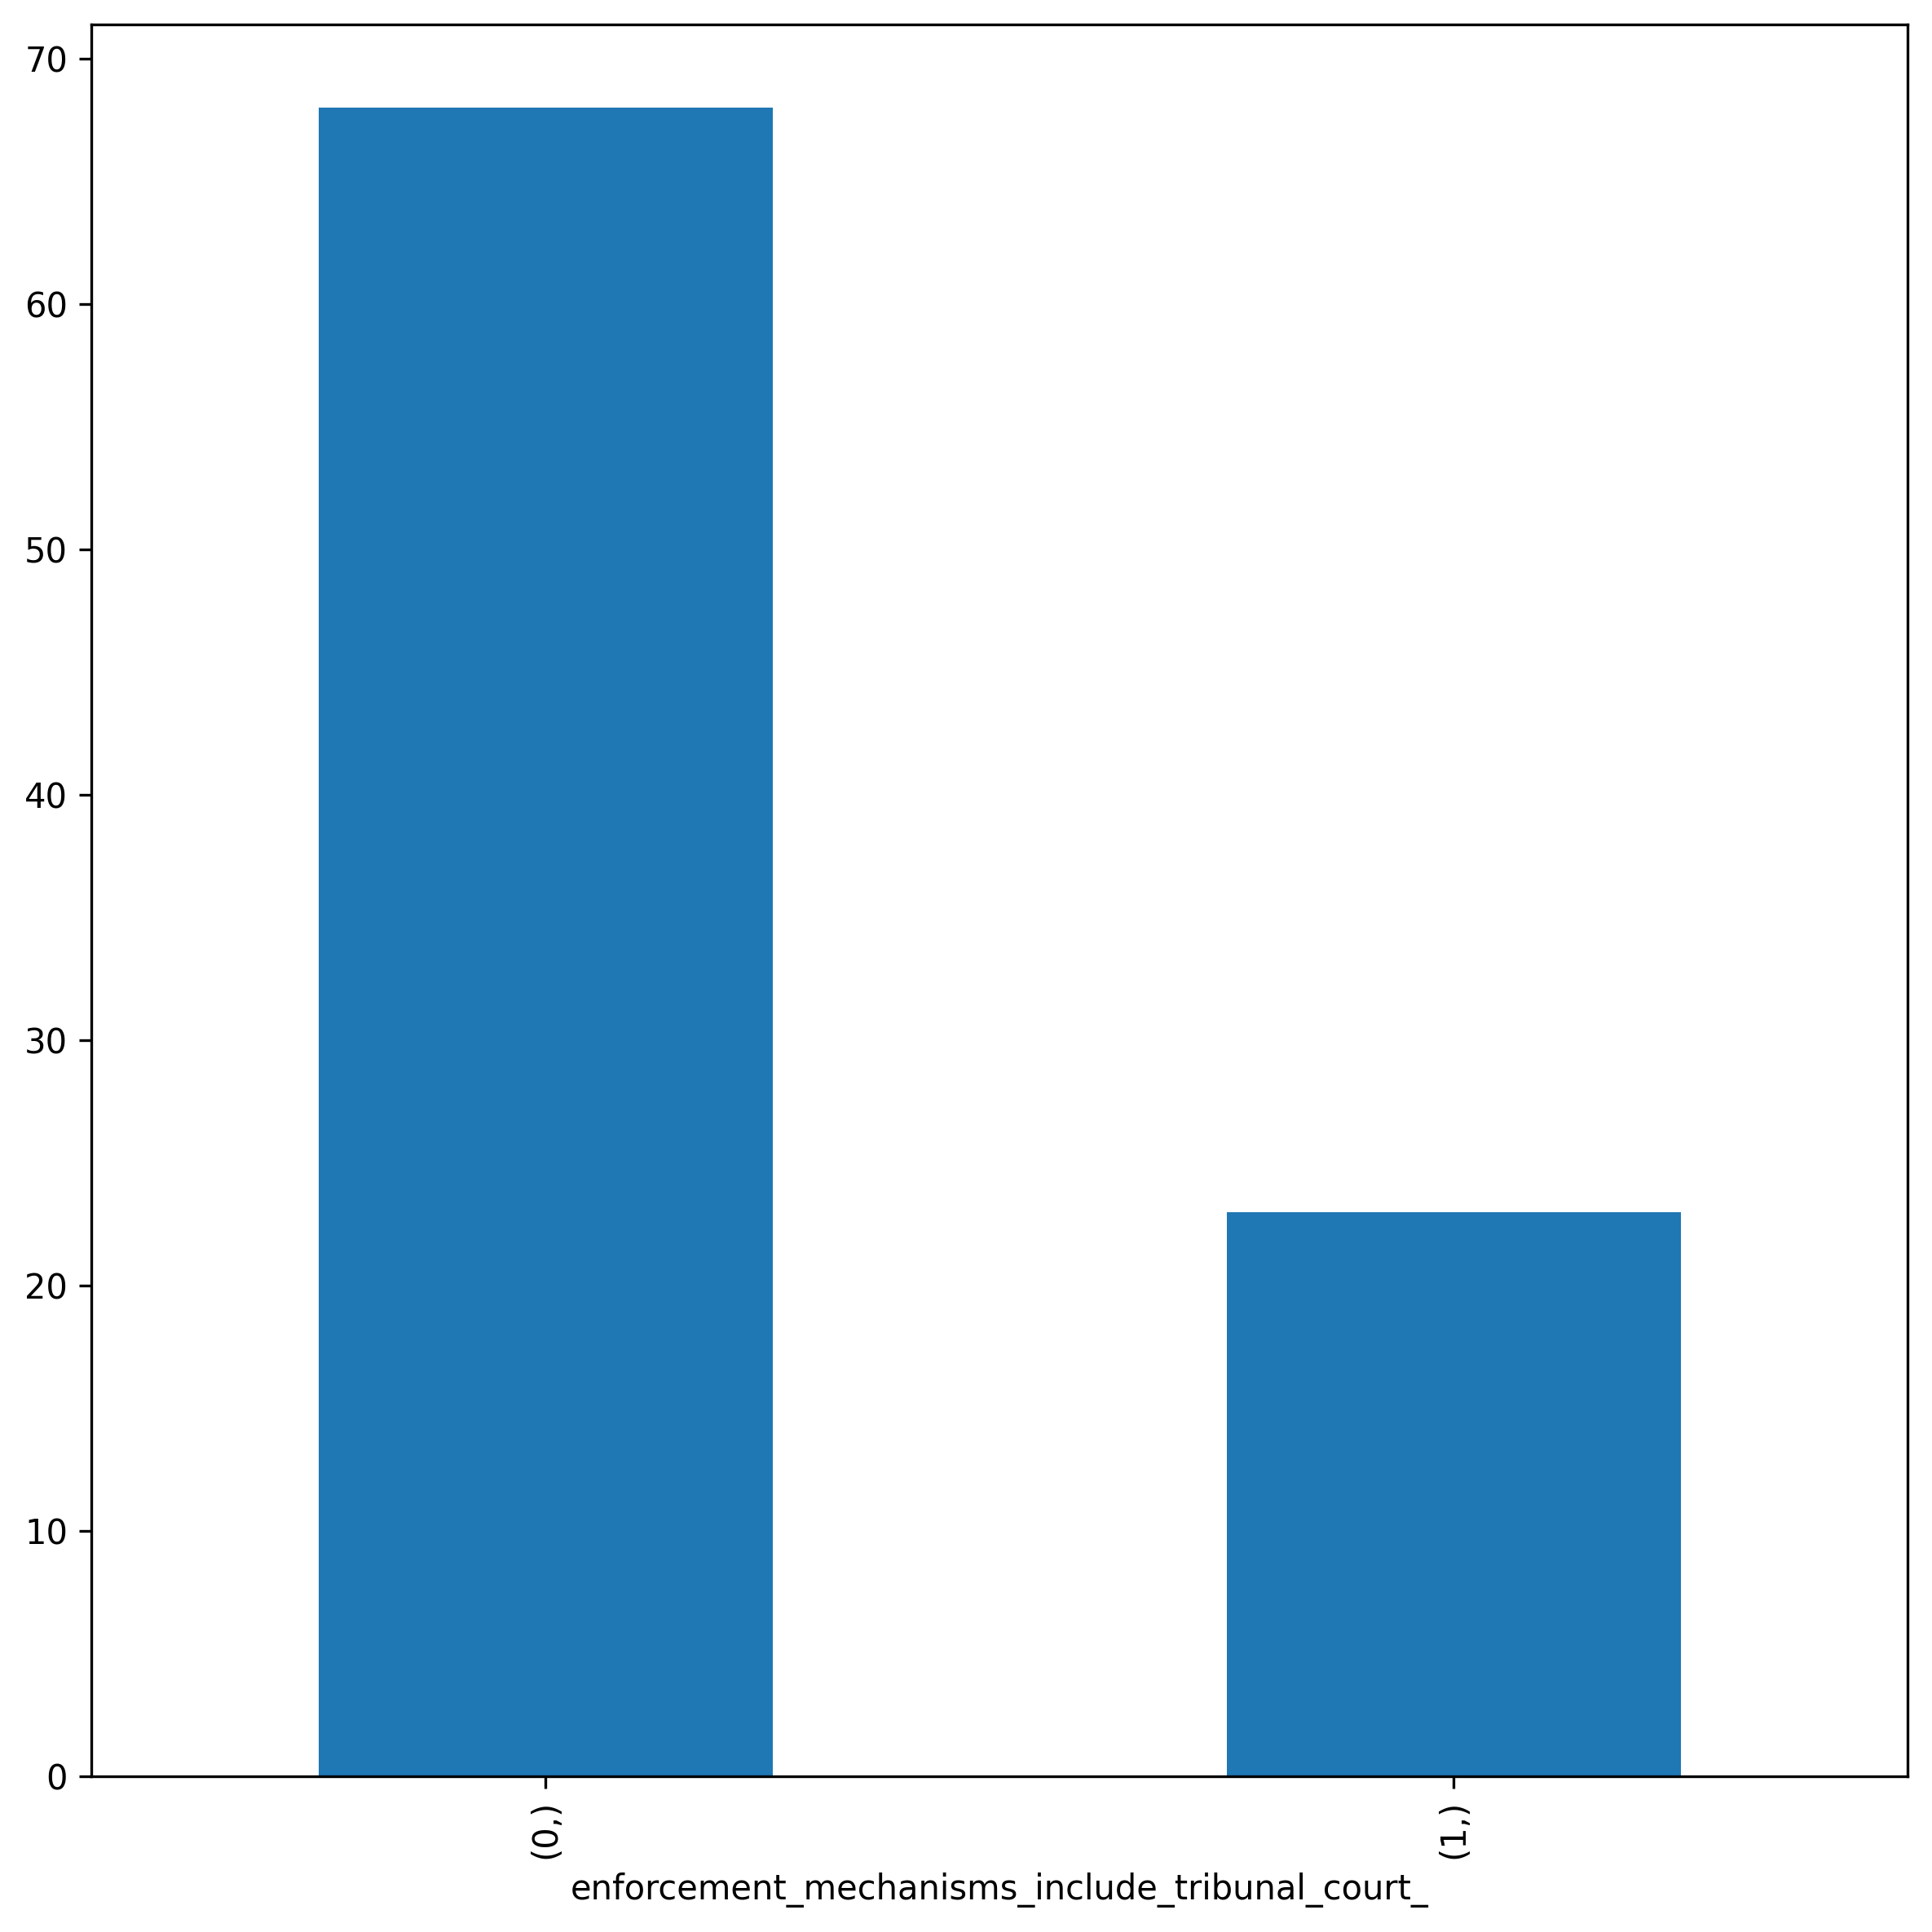

In [20]:
plt.figure(figsize=(8,8))

gov_df[court_col].value_counts().plot(kind='bar')

plt.tight_layout()
plt.savefig(fig_dir + 'histogram.png')
plt.show()

## Correlations

In [21]:
data_plot = gov_df.select_dtypes(include=[np.number]).dropna()

In [22]:
data_plot.describe()

Time span: Start  Time span: End  is_SCCS  \
count         65.000000       65.000000     65.0   
mean         522.276923      922.907692      0.0   
std         1415.291738     1279.133065      0.0   
min        -4100.000000    -3300.000000      0.0   
25%         -480.000000      -27.000000      0.0   
50%         1081.000000     1521.000000      0.0   
75%         1700.000000     1900.000000      0.0   
max         1900.000000     2023.000000      0.0   

       enforcement_mechanisms_include_jury_judge  \
count                                  65.000000   
mean                                    0.107692   
std                                     0.312404   
min                                     0.000000   
25%                                     0.000000   
50%                                     0.000000   
75%                                     0.000000   
max                                     1.000000   

       access_mechanisms_include_life_appointment  \
count                                   65.000000   
mean                                     0.030769   
std                                      0.174036   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                      0.000000   
max                                      1.000000   

       enforcement_mechanisms_include_judicial_review  \
count                                       65.000000   
mean                                         0.030769   
std                                          0.174036   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                          0.000000   
max                                          1.000000   

       decision_making_mechanisms_include_president_consul_chief_executive  \
count                                          65.000000                     
mean                                            0.169231                     
std                                             0.377874                     
min                                             0.000000                     
25%                                             0.000000                     
50%                                             0.000000                     
75%                                             0.000000                     
max                                             1.000000                     

       decision_making_mechanisms_include_secret_ballot  \
count                                         65.000000   
mean                                           0.046154   
std                                            0.211451   
min                                            0.000000   
25%                                            0.000000   
50%                                            0.000000   
75%                                            0.000000   
max                                            1.000000   

       access_mechanisms_include_patronage_for_office  \
count                                       65.000000   
mean                                         0.046154   
std                                          0.211451   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                          0.000000   
max                                          1.000000   

       access_mechanisms_include_enfranchisement  \
count                                  65.000000   
mean                                    0.030769   
std                                     0.174036   
min                                     0.000000   
25%                                     0.000000   
50%             

In [23]:
normalized = Normalizer().fit_transform(data_plot)

norm_df = pd.DataFrame(normalized)
norm_df.columns = data_plot.columns
norm_corr = norm_df.corr()

norm_corr.head()

Time span: Start  Time span: End  \
Time span: Start                                    1.000000        0.948930   
Time span: End                                      0.948930        1.000000   
is_SCCS                                                  NaN             NaN   
enforcement_mechanisms_include_jury_judge          -0.284994       -0.257549   
access_mechanisms_include_life_appointment          0.120910        0.119906   

                                            is_SCCS  \
Time span: Start                                NaN   
Time span: End                                  NaN   
is_SCCS                                         NaN   
enforcement_mechanisms_include_jury_judge       NaN   
access_mechanisms_include_life_appointment      NaN   

                                            enforcement_mechanisms_include_jury_judge  \
Time span: Start                                                            -0.284994   
Time span: End                                                              -0.257549   
is_SCCS                                                                           NaN   
enforcement_mechanisms_include_jury_judge                                    1.000000   
access_mechanisms_include_life_appointment                                  -0.051003   

                                            access_mechanisms_include_life_appointment  \
Time span: Start                                                              0.120910   
Time span: End                                                                0.119906   
is_SCCS                                                                            NaN   
enforcement_mechanisms_include_jury_judge                                    -0.051003   
access_mechanisms_include_life_appointment                                    1.000000   

                                            enforcement_mechanisms_include_judicial_review  \
Time span: Start                                                                 -0.167879   
Time span: End                                                                   -0.186300   
is_SCCS                                                                                NaN   
enforcement_mechanisms_include_jury_judge                                         0.605856   
access_mechanisms_include_life_appointment                                       -0.027607   

                                            decision_making_mechanisms_include_president_consul_chief_executive  \
Time span: Start                                                                     0.038241                     
Time span: End                                                                       0.073755                     
is_SCCS                                                                                   NaN                     
enforcement_mechanisms_include_jury_judge                                           -0.115794                     
access_mechanisms_include_life_appointment                                          -0.072048                     

                                            decision_making_mechanisms_include_secret_ballot  \
Time span: Start                                                                   -0.243010   
Time span: End                                                                     -0.220736   
is_SCCS                                                                                  NaN   
enforcement_mechanisms_include_jury_judge                                           0.871357   
access_mechanisms_include_life_appointment                                         -0.035082   

                                            access_mechanisms_include_patronage_for_office  \
Time span: Start                                                                  0.030792   
Time span: End                                                                    0.025174   
is_SCCS                                  

In [24]:
courts_corr = norm_corr[court_col]

In [25]:
courts_corr

enforcement_mechanisms_include_tribunal_court_
Time span: Start                                                                         -0.253566
Time span: End                                                                           -0.207736
is_SCCS                                                                                        NaN
enforcement_mechanisms_include_jury_judge                                                 0.380834
access_mechanisms_include_life_appointment                                                0.026920
enforcement_mechanisms_include_judicial_review                                            0.428714
decision_making_mechanisms_include_president_co...                                       -0.044482
decision_making_mechanisms_include_secret_ballot                                          0.285985
access_mechanisms_include_patronage_for_office                                           -0.048623
access_mechanisms_include_enfranchisement                                                -0.075893
enforcement_mechanisms_include_tribunal_court_                                            1.000000
decision_making_mechanisms_include_magistrate_o...                                        0.354624
enforcement_mechanisms_include_forced_labour                                             -0.043373
access_mechanisms_include_age_boundaries                                                  0.300488
decision_making_mechanisms_include_plurality_vo...                                        0.428156
access_mechanisms_include_female_participation                                           -0.090551
decision_making_mechanisms_include_word_of_mouth                                          0.114829
access_mechanisms_include_payment_for_occupying...                                       -0.093090
access_mechanisms_include_gerontocracy                                                   -0.107381
decision_making_mechanisms_include_leader_first...                                       -0.113142
enforcement_mechanisms_include_fines                                                      0.433181
decision_making_mechanisms_include_coalition                                             -0.053257
decision_making_mechanisms_include_assembly_elite                                         0.079877
decision_making_mechanisms_include_rule_of_law                                            0.406276
decision_making_mechanisms_include_supermajority                                          0.095431
decision_making_mechanisms_include_frequent_and...                                        0.335515
access_mechanisms_include_open_political_unit                                            -0.078570
enforcement_mechanisms_include_graduated_sanctions                                       -0.053257
decision_making_mechanisms_include_council_local                                         -0.156083
decision_making_mechanisms_include_deliberation                                           0.323780
decision_making_mechanisms_include_confederacy                                           -0.036972
decision_making_mechanisms_include_balance_of_p...                                       -0.074583
decision_making_mechanisms_include_remunerated_...                                        0.304263
enforcement_mechanisms_include_seizing_of_property                                        0.428156
enforcement_mechanisms_include_capital_punishment                                         0.392056
access_mechanisms_include_blood_relations                                                 0.309354
enforcement_mechanisms_include_reputational_risk                                         -0.034781
enforcement_mechanisms_include_suspension_expul...                                        0.602019
enforcement_mechanisms_include_police                                                     0.068552
access_mechanisms_include_induction_rite_ceremony                                         0.

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(
    courts_corr.sort_values(by='enforcement_mechanisms_include_tribunal_court_', ascending=False), 
    annot=True,
    cmap='BrBG',
    vmin=-1,
    vmax=1
)

plt.tight_layout()
plt.savefig(fig_dir + 'courts_corr.png')
plt.show()

## Courts Analysis: Mechanisms

### Access

In [ ]:
access_courts_corr = courts_corr[courts_corr.index.str.startswith('access')]

In [ ]:
access_courts_corr

enforcement_mechanisms_include_tribunal_court_
access_mechanisms_include_life_appointment                                                0.026920
access_mechanisms_include_patronage_for_office                                           -0.048623
access_mechanisms_include_enfranchisement                                                -0.075893
access_mechanisms_include_age_boundaries                                                  0.300488
access_mechanisms_include_female_participation                                           -0.090551
access_mechanisms_include_payment_for_occupying...                                       -0.093090
access_mechanisms_include_gerontocracy                                                   -0.107381
access_mechanisms_include_open_political_unit                                            -0.078570
access_mechanisms_include_blood_relations                                                 0.309354
access_mechanisms_include_induction_rite_ceremony                                         0.107547
access_mechanisms_include_lottery_random_selection                                        0.263162
access_mechanisms_include_election                                                        0.268704
access_mechanisms_include_matrilineality                                                 -0.087331
access_mechanisms_include_meritocracy                                                    -0.167209
access_mechanisms_include_co-optation                                                    -0.093248
access_mechanisms_include_screening_process                                               0.297733
access_mechanisms_include_divine_right                                                    0.034596
access_mechanisms_include_dreaming                                                       -0.093643
access_mechanisms_include_popularity_                                                    -0.093496
access_mechanisms_include_heredity                                                       -0.204177
access_mechanisms_include_property_requirement                                            0.391281
access_mechanisms_include_matriarchy                                                     -0.031236

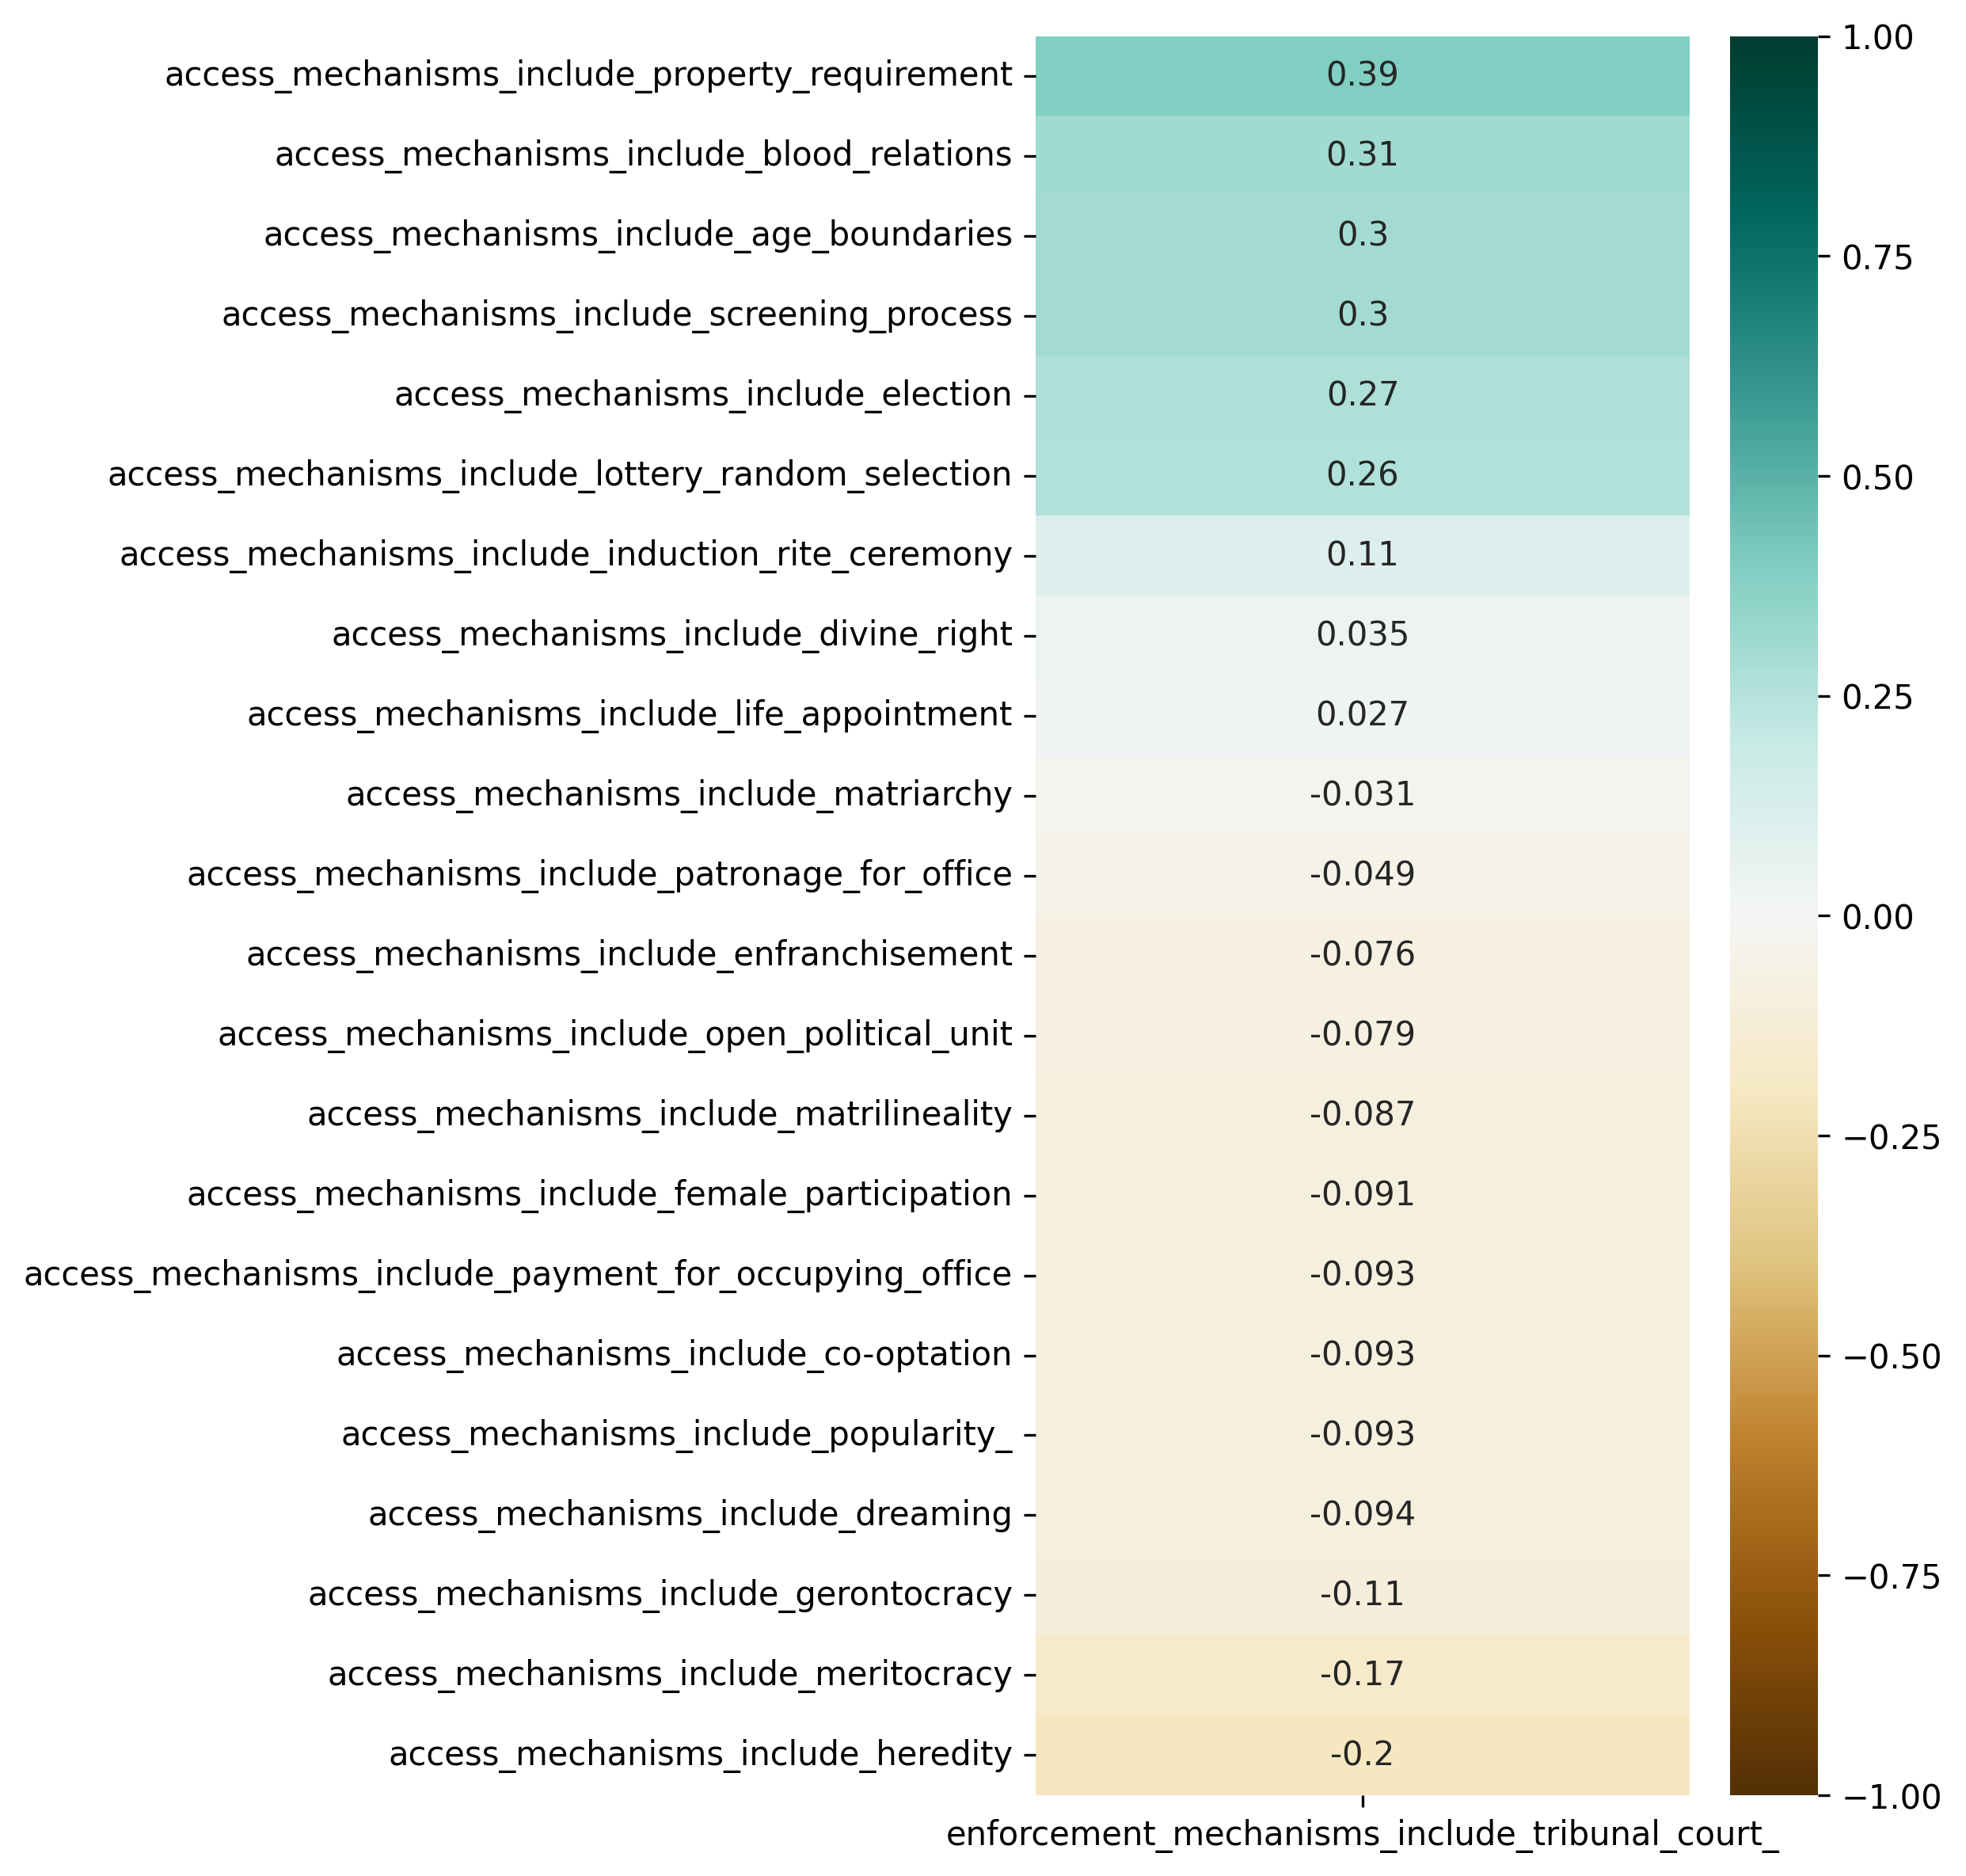

In [29]:
plt.figure(figsize=(8,8))
sns.heatmap(
    access_courts_corr.sort_values(by=courts, ascending=False), 
    annot=True,
    cmap='BrBG',
    vmin=-1,
    vmax=1
)

plt.tight_layout()
plt.savefig(fig_dir + 'access_courts_corr.png')
plt.show()

### Decision Making

In [30]:
dm_courts_corr = courts_corr[courts_corr.index.str.startswith('decision_making')]

In [31]:
dm_courts_corr

enforcement_mechanisms_include_tribunal_court_
decision_making_mechanisms_include_president_co...                                       -0.044482
decision_making_mechanisms_include_secret_ballot                                          0.285985
decision_making_mechanisms_include_magistrate_o...                                        0.354624
decision_making_mechanisms_include_plurality_vo...                                        0.428156
decision_making_mechanisms_include_word_of_mouth                                          0.114829
decision_making_mechanisms_include_leader_first...                                       -0.113142
decision_making_mechanisms_include_coalition                                             -0.053257
decision_making_mechanisms_include_assembly_elite                                         0.079877
decision_making_mechanisms_include_rule_of_law                                            0.406276
decision_making_mechanisms_include_supermajority                                          0.095431
decision_making_mechanisms_include_frequent_and...                                        0.335515
decision_making_mechanisms_include_council_local                                         -0.156083
decision_making_mechanisms_include_deliberation                                           0.323780
decision_making_mechanisms_include_confederacy                                           -0.036972
decision_making_mechanisms_include_balance_of_p...                                       -0.074583
decision_making_mechanisms_include_remunerated_...                                        0.304263
decision_making_mechanisms_include_agenda_setting                                         0.268256
decision_making_mechanisms_include_kingchief-as...                                       -0.098140
decision_making_mechanisms_include_unanimity                                              0.039878
decision_making_mechanisms_include_bureaucracy                                            0.081632
decision_making_mechanisms_include_checks_and_b...                                       -0.054011
decision_making_mechanisms_include_majority_voting                                        0.332735
decision_making_mechanisms_include_board_committee                                       -0.140350
decision_making_mechanisms_include_mandate                                               -0.053257
decision_making_mechanisms_include_oath                                                   0.486939
decision_making_mechanisms_include_lobbying                                               0.114829
decision_making_mechanisms_include_gathering                                             -0.101519
decision_making_mechanisms_include_petition                                               0.043168
decision_making_mechanisms_include_assembly_cen...                                        0.435902
decision_making_mechanisms_include_ratification...                                        0.099196
decision_making_mechanisms_include_autocratic_l...                                       -0.087774
decision_making_mechanisms_include_constitution                                           0.365251
decision_making_mechanisms_include_council_cent...                                        0.320536
decision_making_mechanisms_include_quorum                                                 0.297733
decision_making_mechanisms_include_group_voting                                          -0.053257
decision_making_mechanisms_include_alliance                                              -0.072392
decision_making_mechanisms_include_vote_by_proxy                                         -0.075762
decision_making_mechanisms_include_assembly_local                                         0.030280
decision_making_mechanisms_include_autocratic_l...                                       -0.013268
decision_making_mechanisms_include_consensus                                              0.

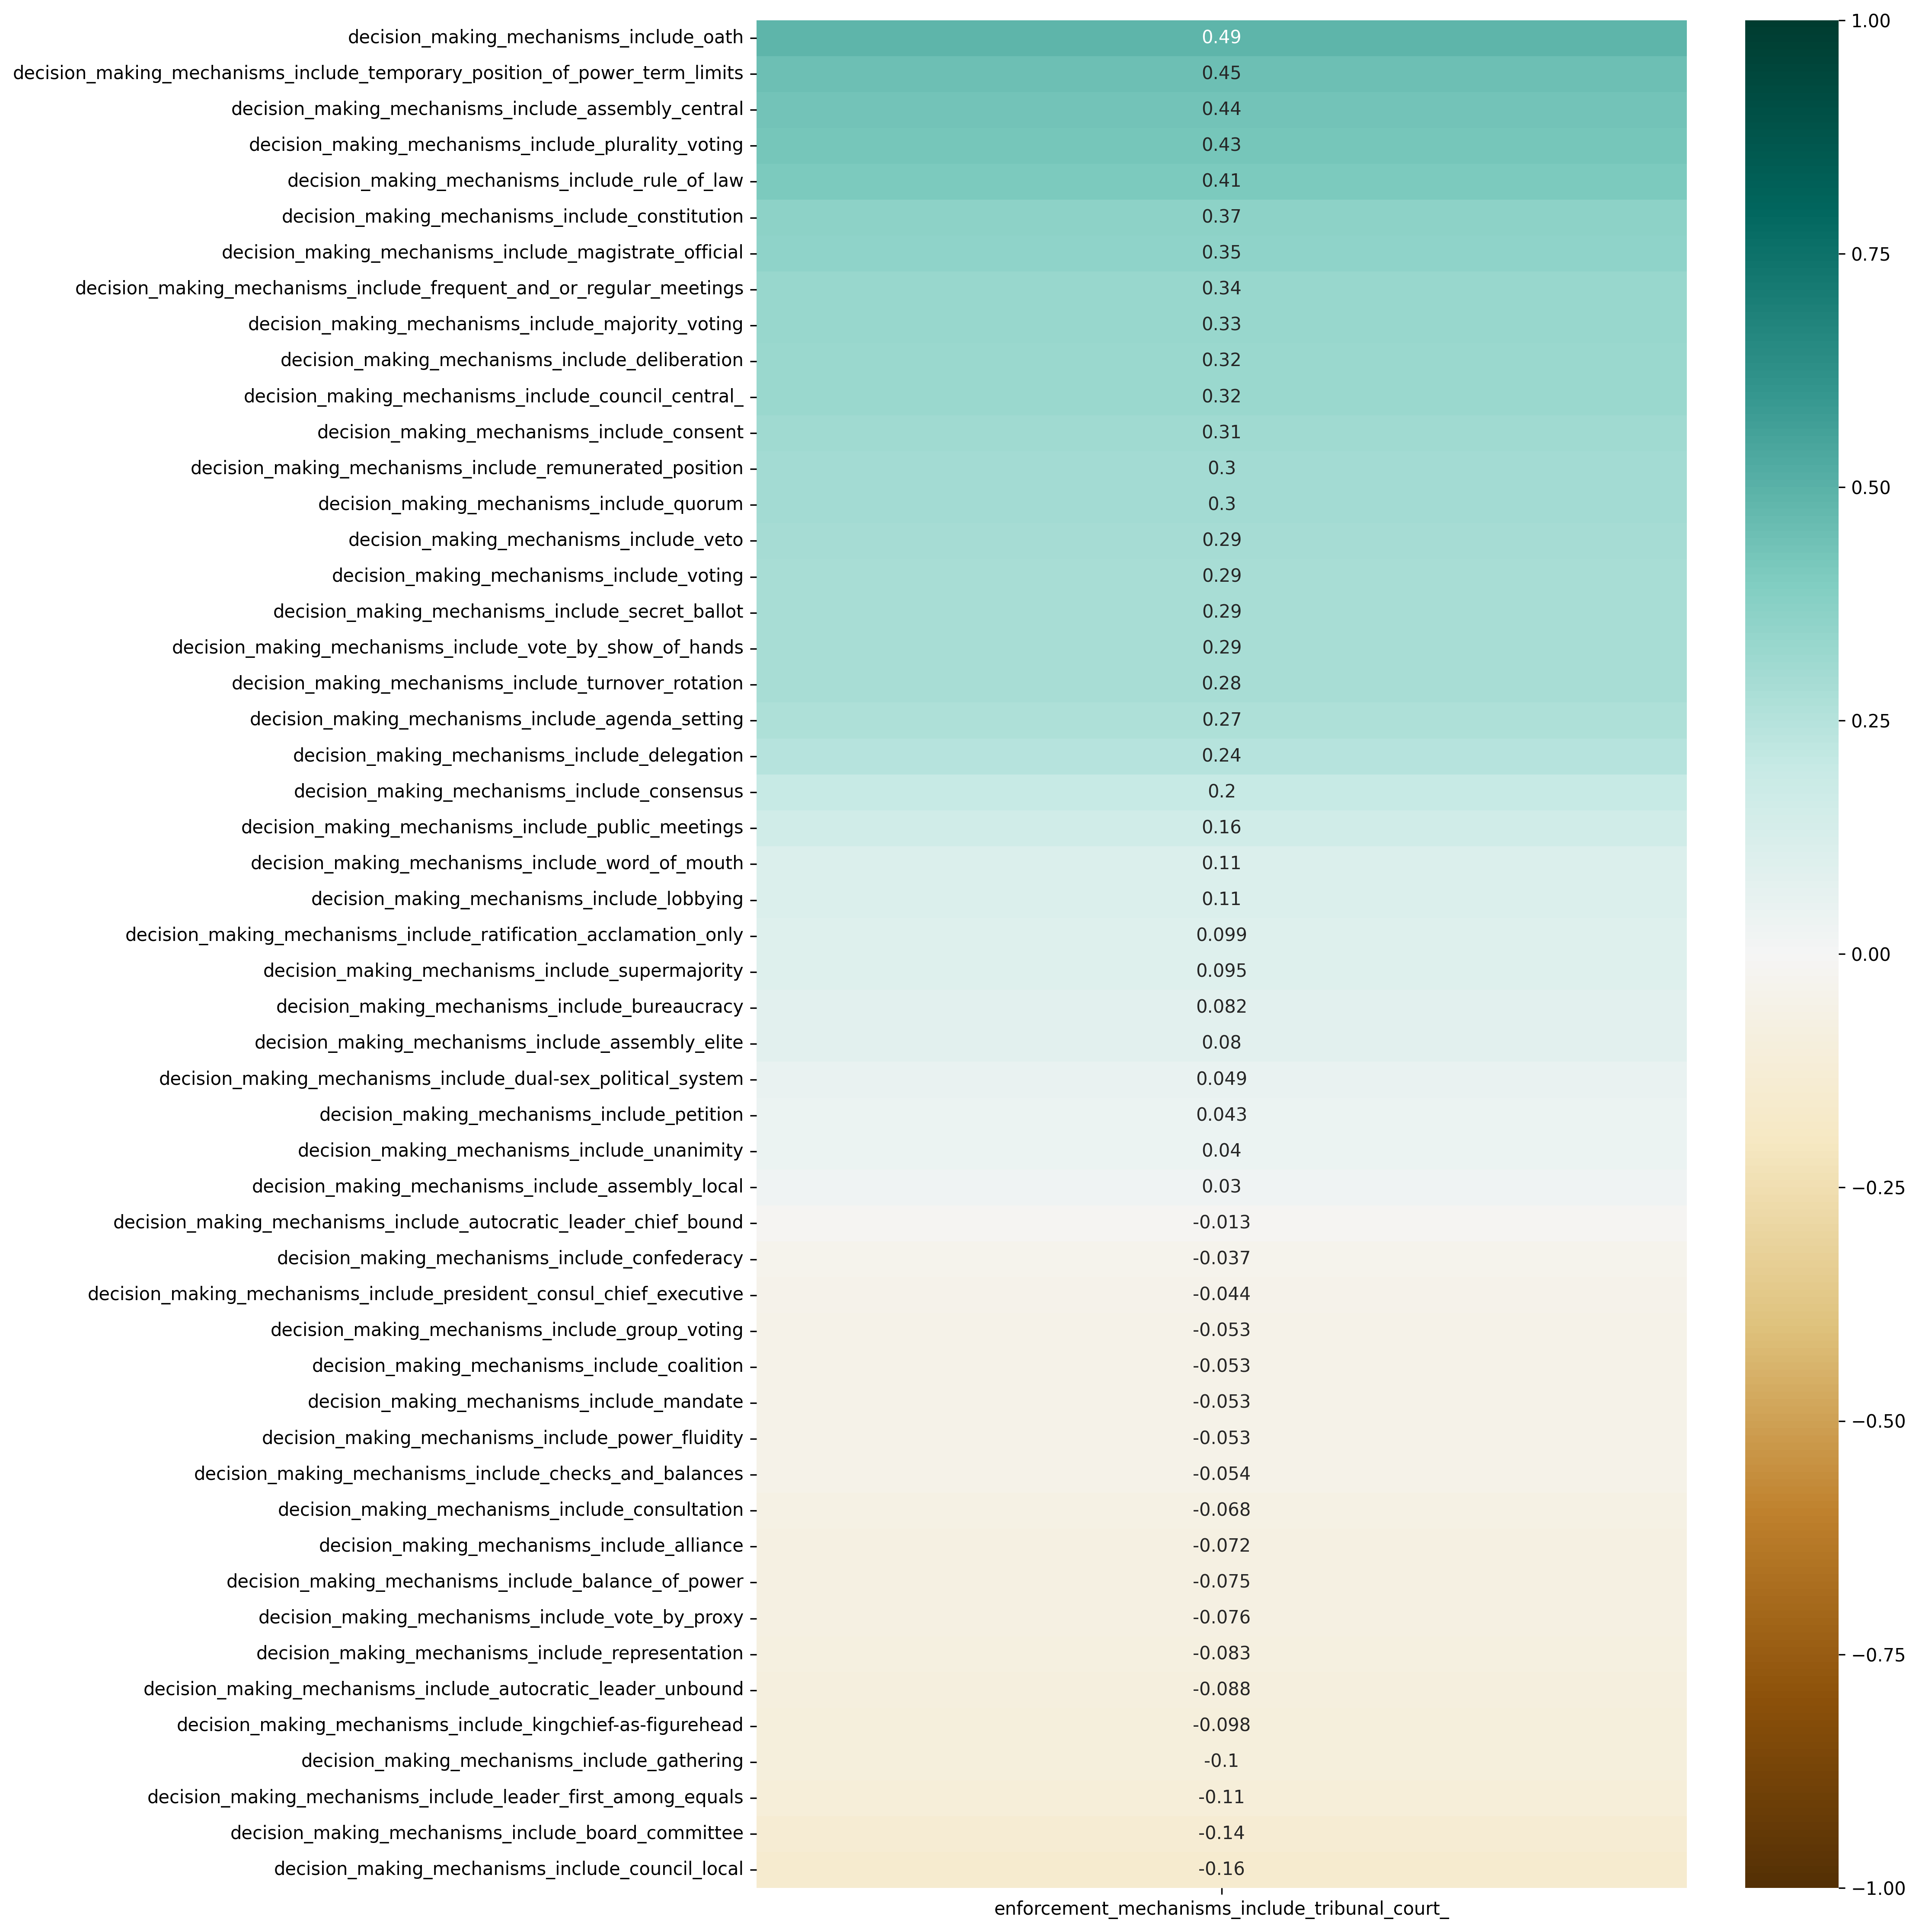

In [32]:
plt.figure(figsize=(15,15))
sns.heatmap(
    dm_courts_corr.sort_values(by=courts, ascending=False), 
    annot=True,
    cmap='BrBG',
    vmin=-1,
    vmax=1
)

plt.tight_layout()
plt.savefig(fig_dir + 'dm_courts_corr.png')
plt.show()

### Enforcement

In [33]:
enforcement_courts_corr = courts_corr[courts_corr.index.str.startswith('enforcement')]

In [34]:
enforcement_courts_corr

enforcement_mechanisms_include_tribunal_court_
enforcement_mechanisms_include_jury_judge                                                 0.380834
enforcement_mechanisms_include_judicial_review                                            0.428714
enforcement_mechanisms_include_tribunal_court_                                            1.000000
enforcement_mechanisms_include_forced_labour                                             -0.043373
enforcement_mechanisms_include_fines                                                      0.433181
enforcement_mechanisms_include_graduated_sanctions                                       -0.053257
enforcement_mechanisms_include_seizing_of_property                                        0.428156
enforcement_mechanisms_include_capital_punishment                                         0.392056
enforcement_mechanisms_include_reputational_risk                                         -0.034781
enforcement_mechanisms_include_suspension_expul...                                        0.602019
enforcement_mechanisms_include_police                                                     0.068552
enforcement_mechanisms_include_corporal_punishm...                                        0.419590
enforcement_mechanisms_include_exit                                                      -0.032702
enforcement_mechanisms_include_arbitration                                                0.431396
enforcement_mechanisms_include_self-help                                                  0.432569
enforcement_mechanisms_include_destruction_of_p...                                       -0.075845
enforcement_mechanisms_include_monitoring                                                 0.416386
enforcement_mechanisms_include_criticism_mockin...                                        0.400293
enforcement_mechanisms_include_litigation                                                 0.488794
enforcement_mechanisms_include_mediation                                                  0.129906
enforcement_mechanisms_include_civil_disobedience                                        -0.053257
enforcement_mechanisms_include_negotiation                                                0.062799
enforcement_mechanisms_include_scrutiny_of_offi...                                        0.276247
enforcement_mechanisms_include_appeal                                                     0.172043
enforcement_mechanisms_include_paying_damages_c...                                        0.436513

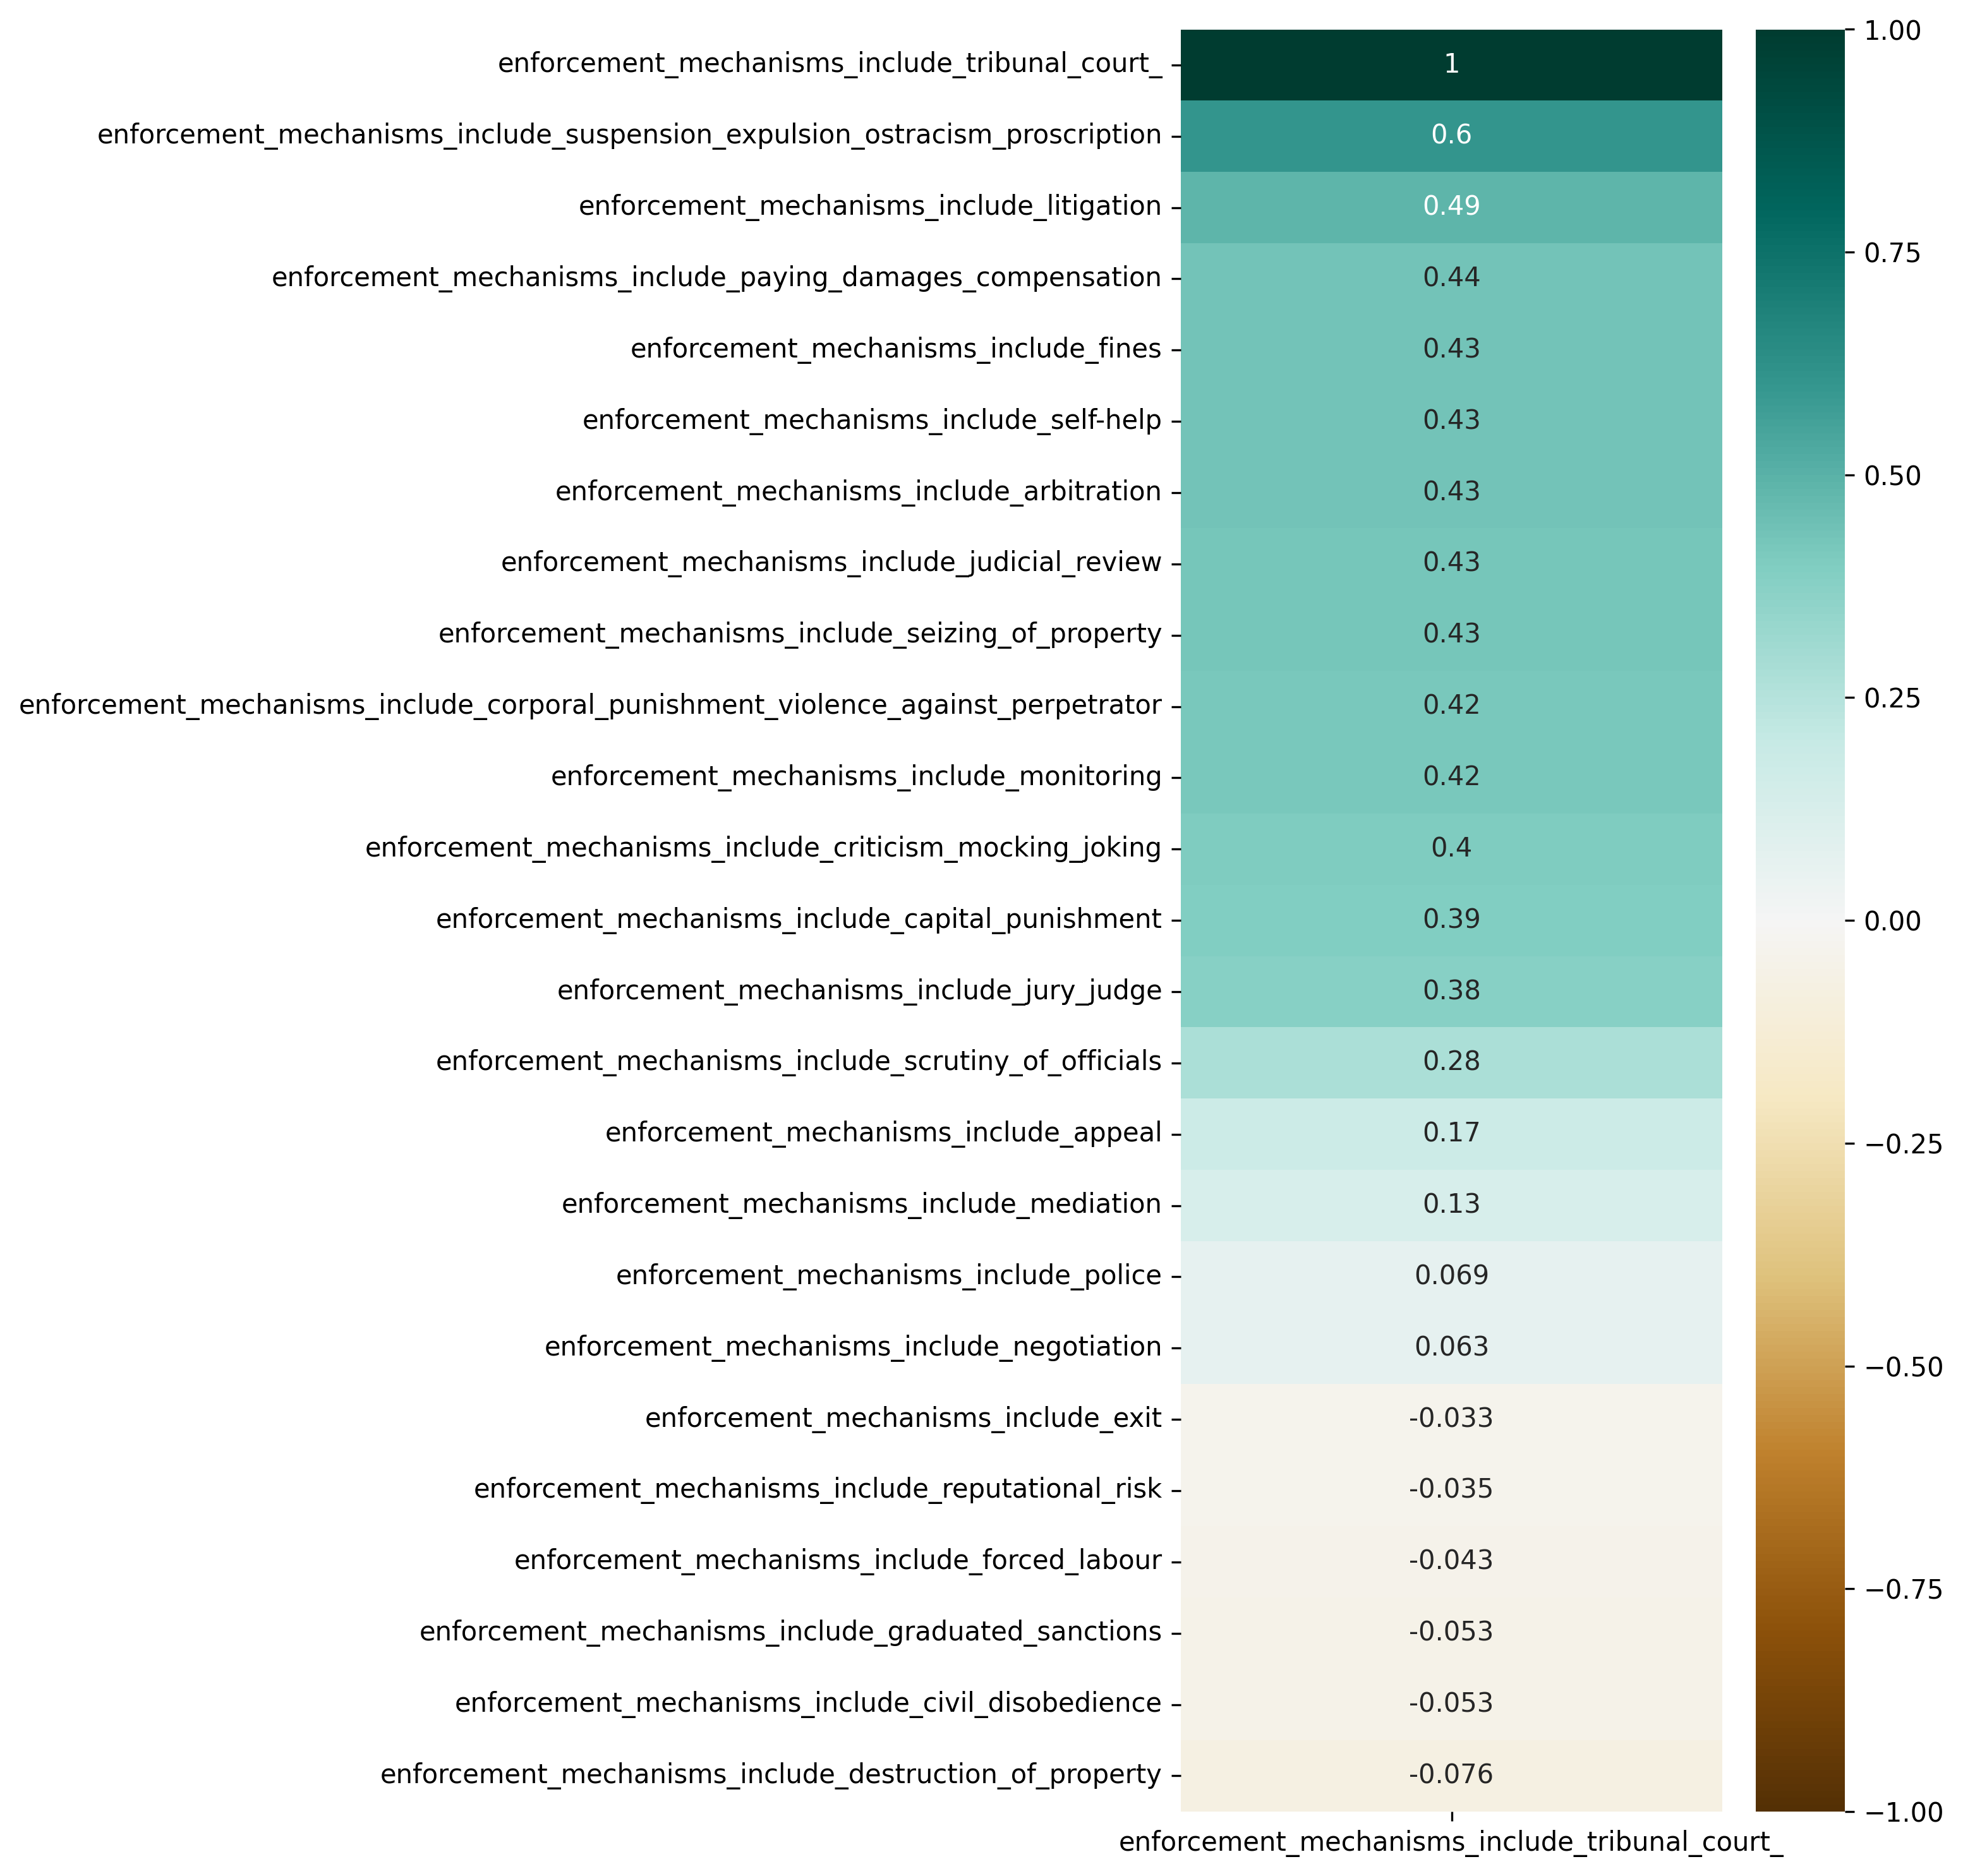

In [35]:
plt.figure(figsize=(10,10))
sns.heatmap(
    enforcement_courts_corr.sort_values(by=courts, ascending=False), 
    annot=True,
    cmap='BrBG',
    vmin=-1,
    vmax=1
)

plt.tight_layout()
plt.savefig(fig_dir + 'enforcement_courts_corr.png')
plt.show()

## Courts Analysis: Size

In [36]:
size_cols = [col for col in col_list if col.startswith('Size:')]
size_cols

['Size: 100 - 1,000',
 'Size: 1,001 - 10,000',
 'Size: 10,001 - 100,000',
 'Size: 100,001 - 1,000,000',
 'Size: 1,000,001 - 10,000,000',
 'Size: 10,000,000+',
 'Size: Unknown']

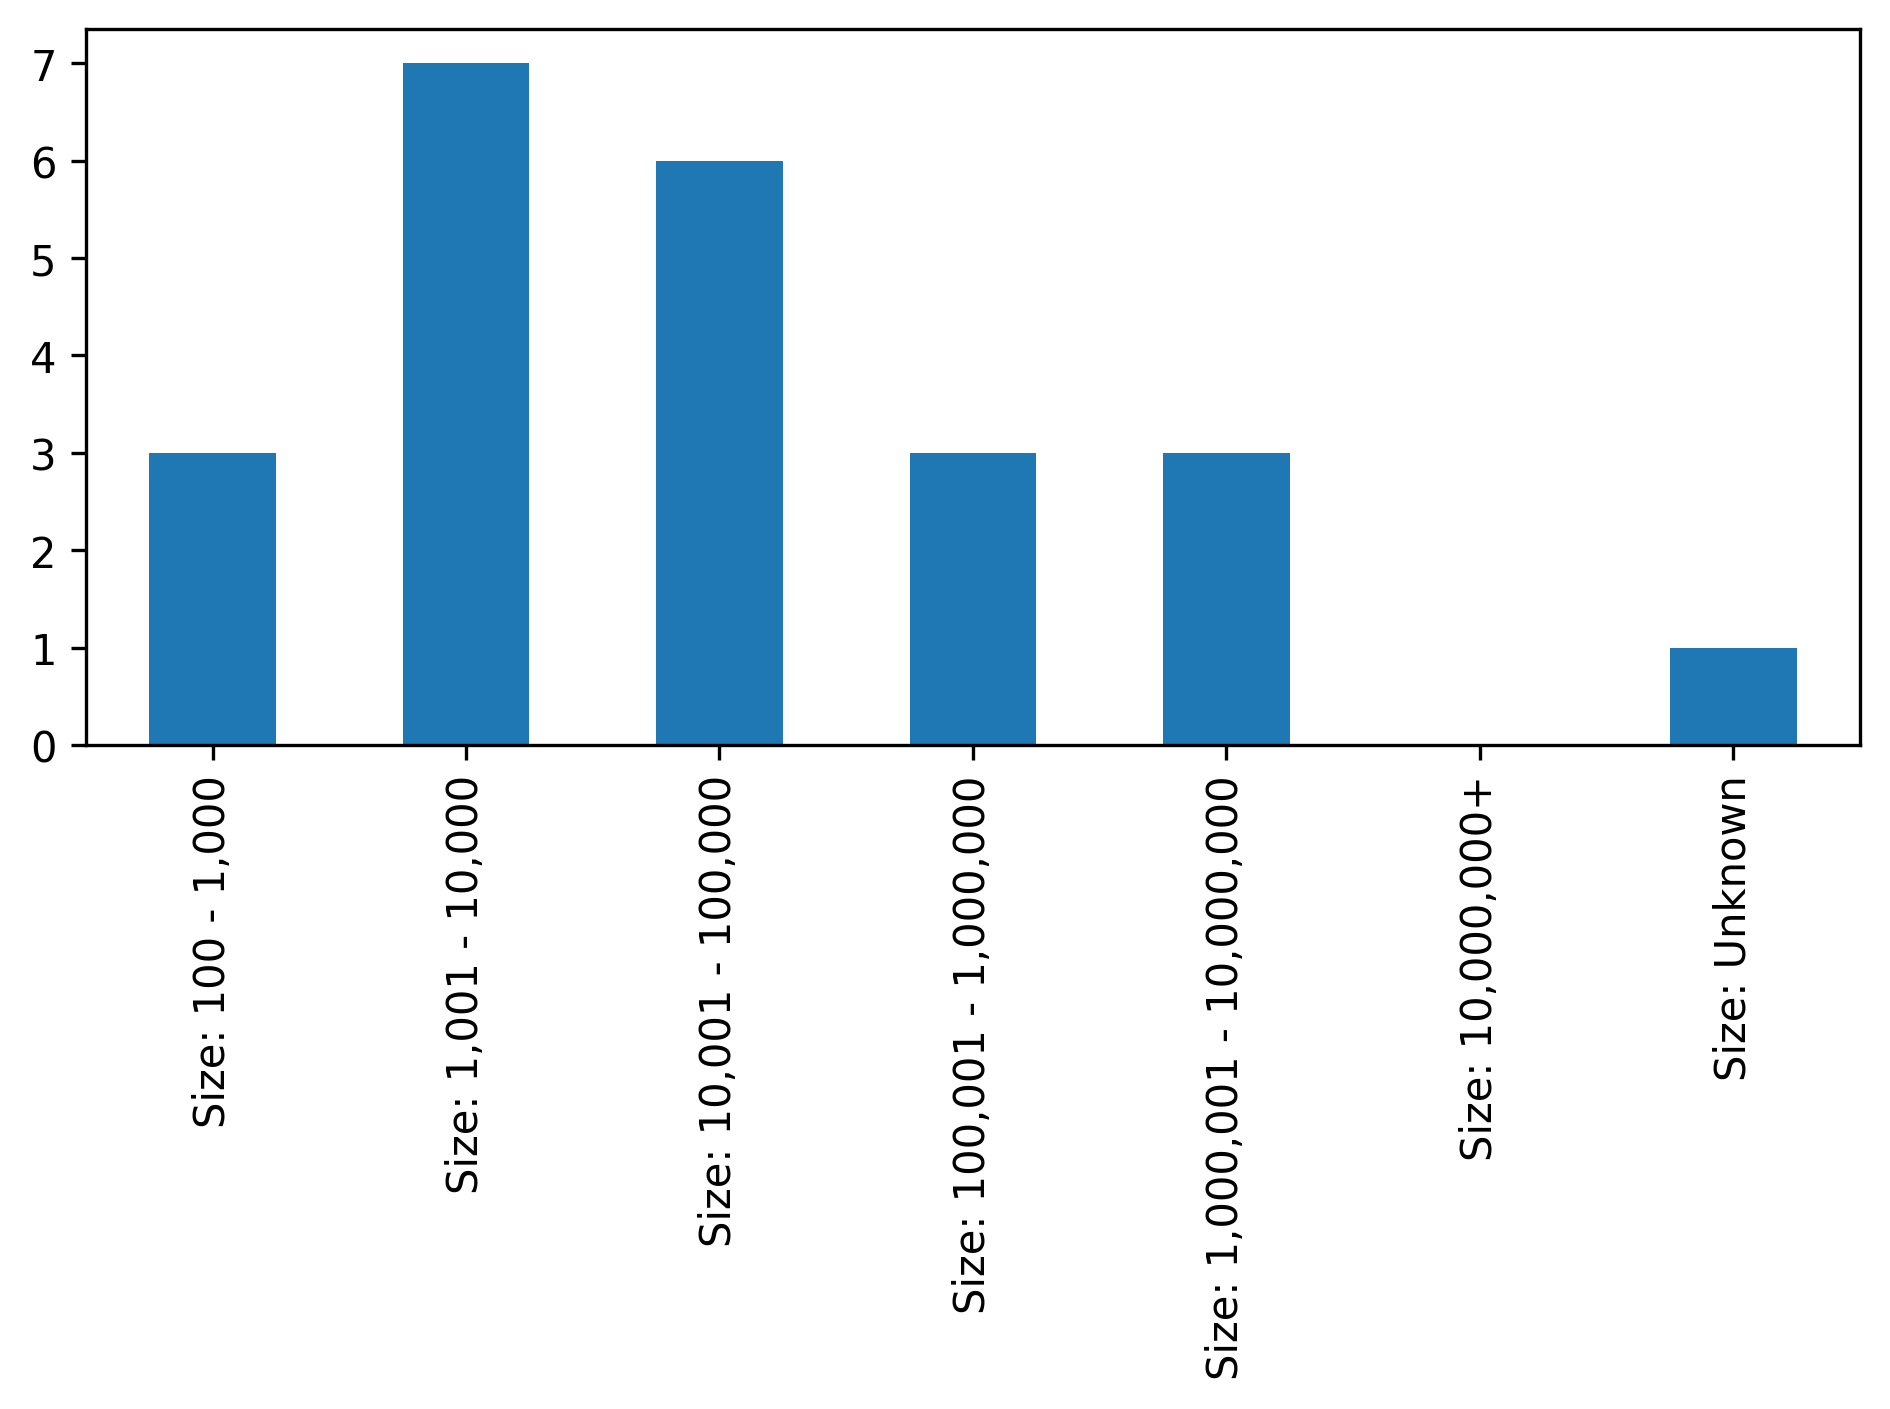

In [37]:
# Size histogram
courts_df[size_cols].sum().plot(kind='bar')

plt.tight_layout()
plt.savefig(fig_dir + 'courts_size_histogram.png')
plt.show()

In [38]:
size_courts_corr = courts_corr[courts_corr.index.str.startswith('Size:')]

In [39]:
size_courts_corr

enforcement_mechanisms_include_tribunal_court_
Size: 100 - 1,000                                                  -0.053257
Size: 1,001 - 10,000                                               -0.075452
Size: 10,001 - 100,000                                              0.076207
Size: 100,001 - 1,000,000                                           0.374321
Size: 1,000,001 - 10,000,000                                        0.050999
Size: 10,000,000+                                                  -0.099532
Size: Unknown                                                      -0.076416

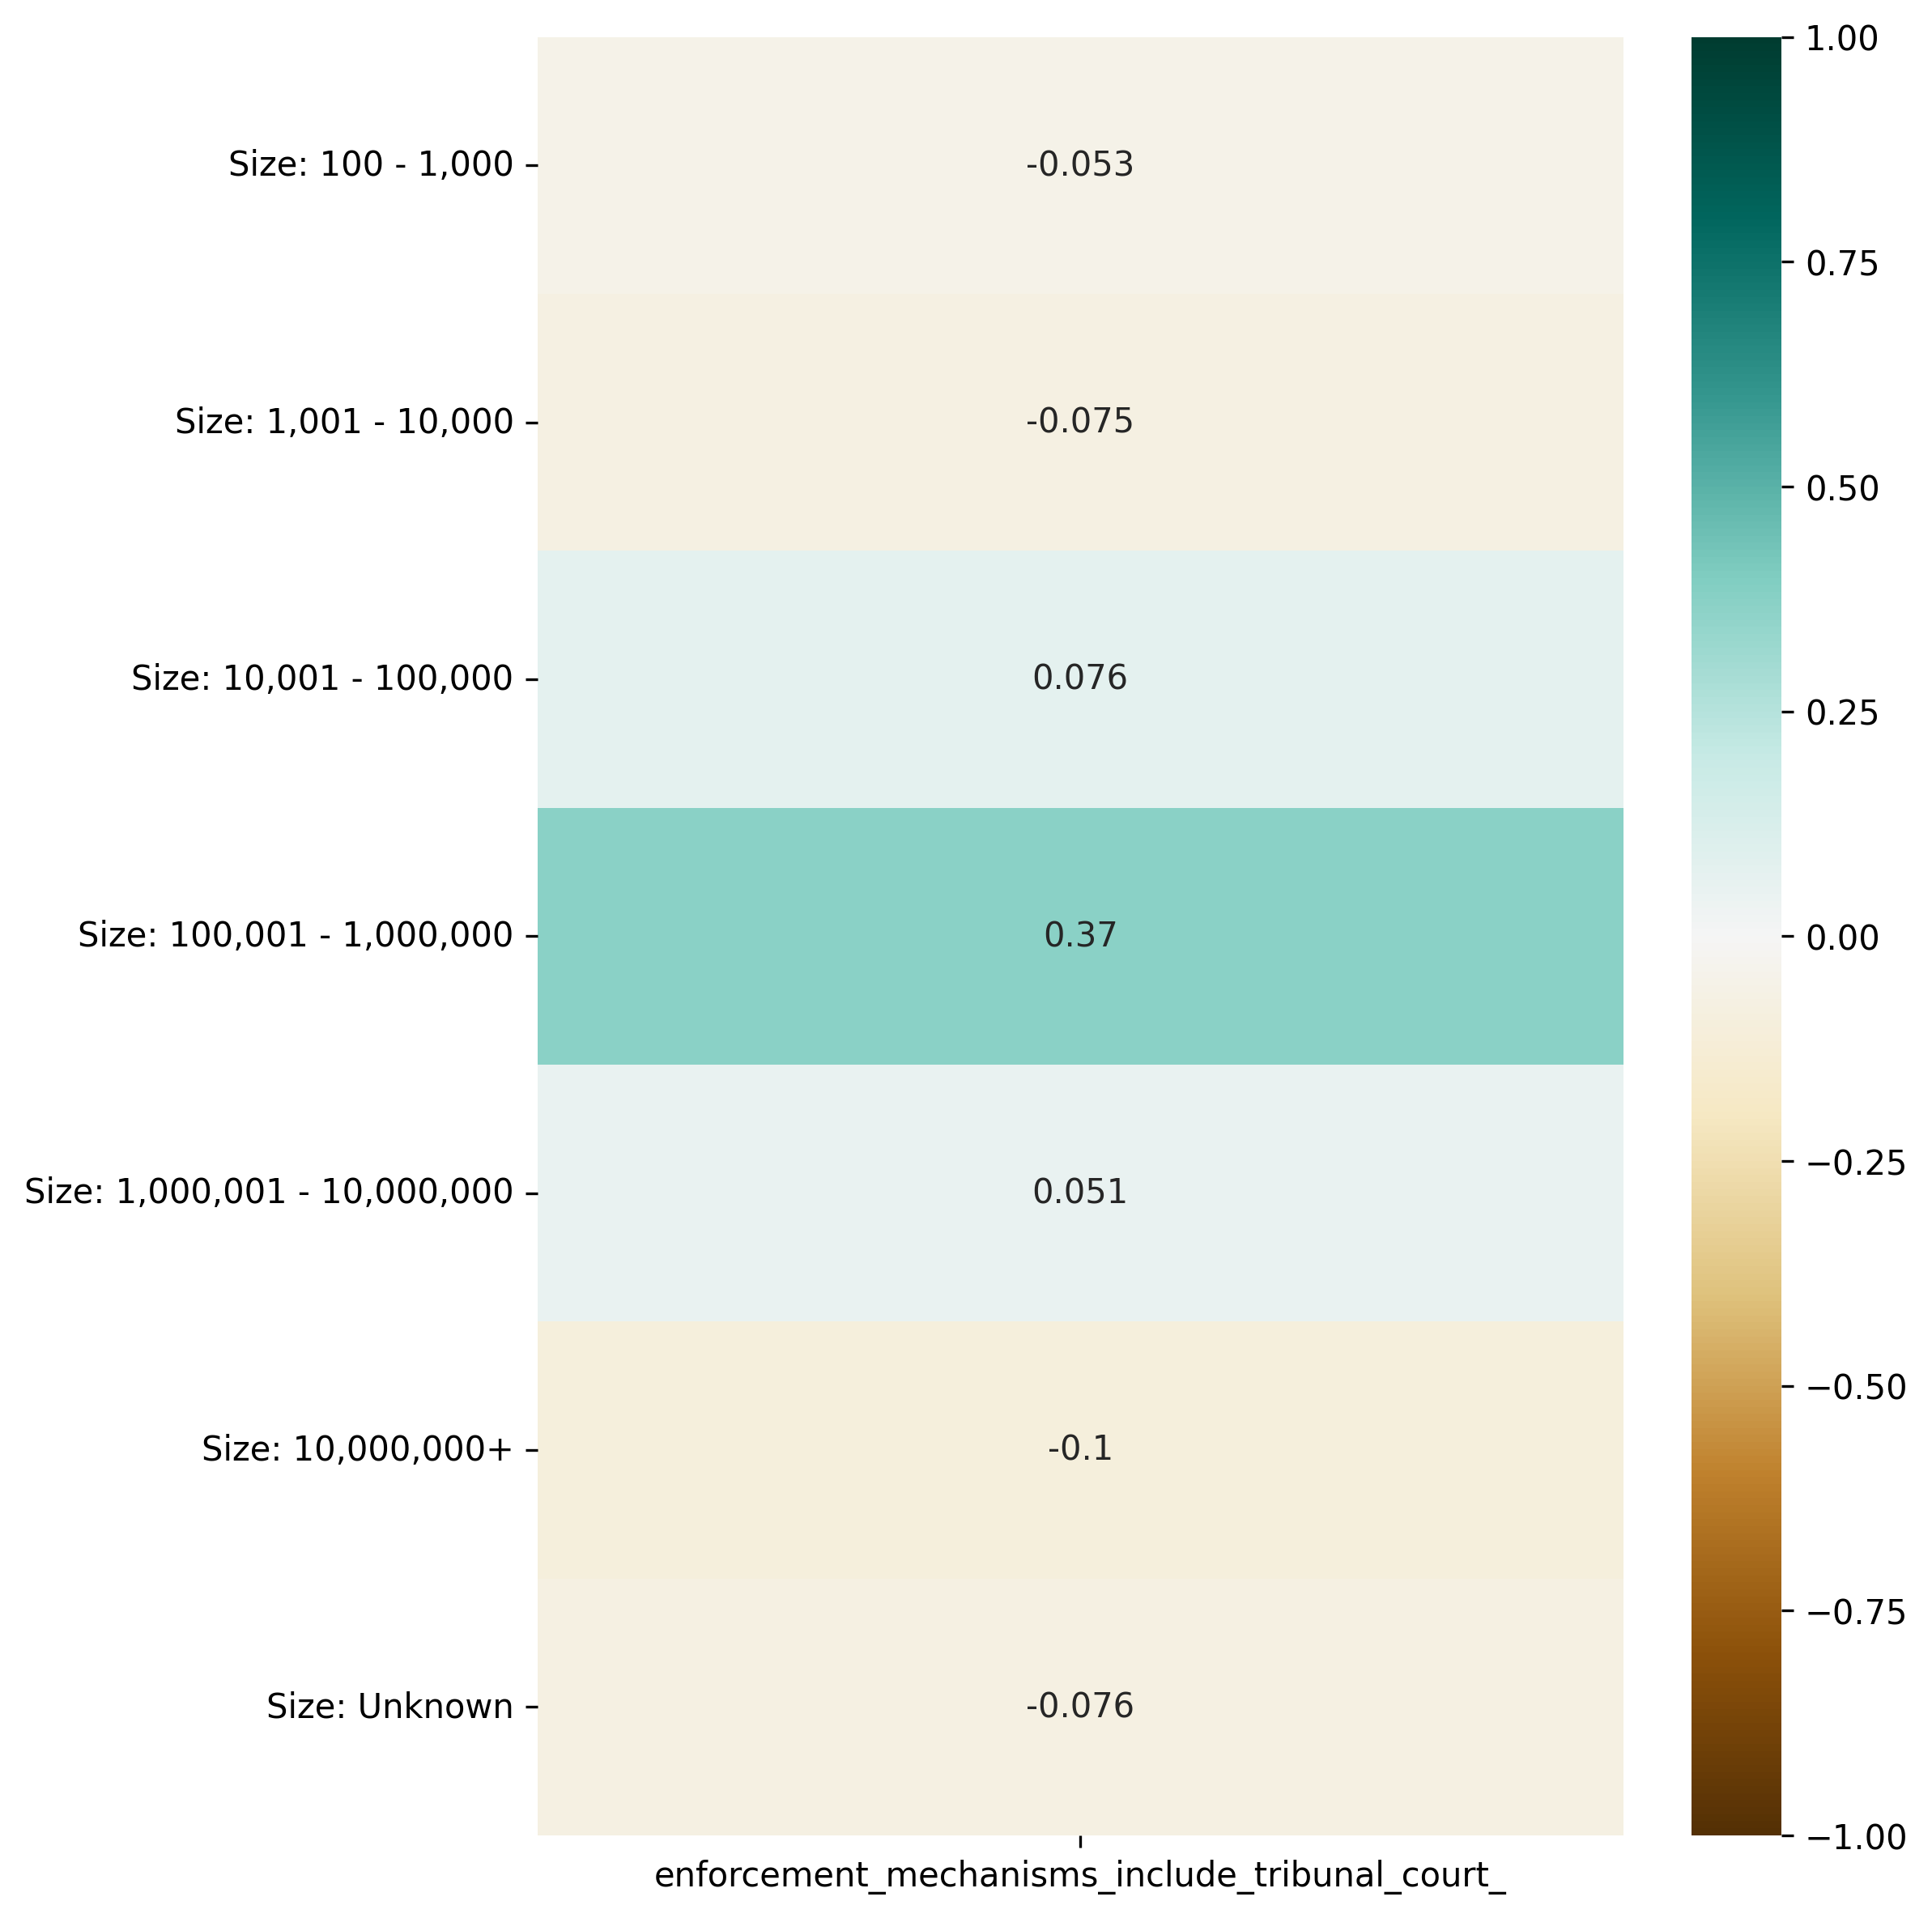

In [40]:
plt.figure(figsize=(8,8))
sns.heatmap(
    size_courts_corr, 
    annot=True,
    cmap='BrBG',
    vmin=-1,
    vmax=1
)

plt.tight_layout()
plt.savefig(fig_dir + 'courts_size_corr.png')
plt.show()

## Councils Analysis: Region

In [41]:
region_cols = [col for col in col_list if col.startswith('Region:')]
region_cols

['Region: Africa',
 'Region: Europe',
 'Region: Asia',
 'Region: Middle East',
 'Region: North America',
 'Region: Central America',
 'Region: South America',
 'Region: Oceania']

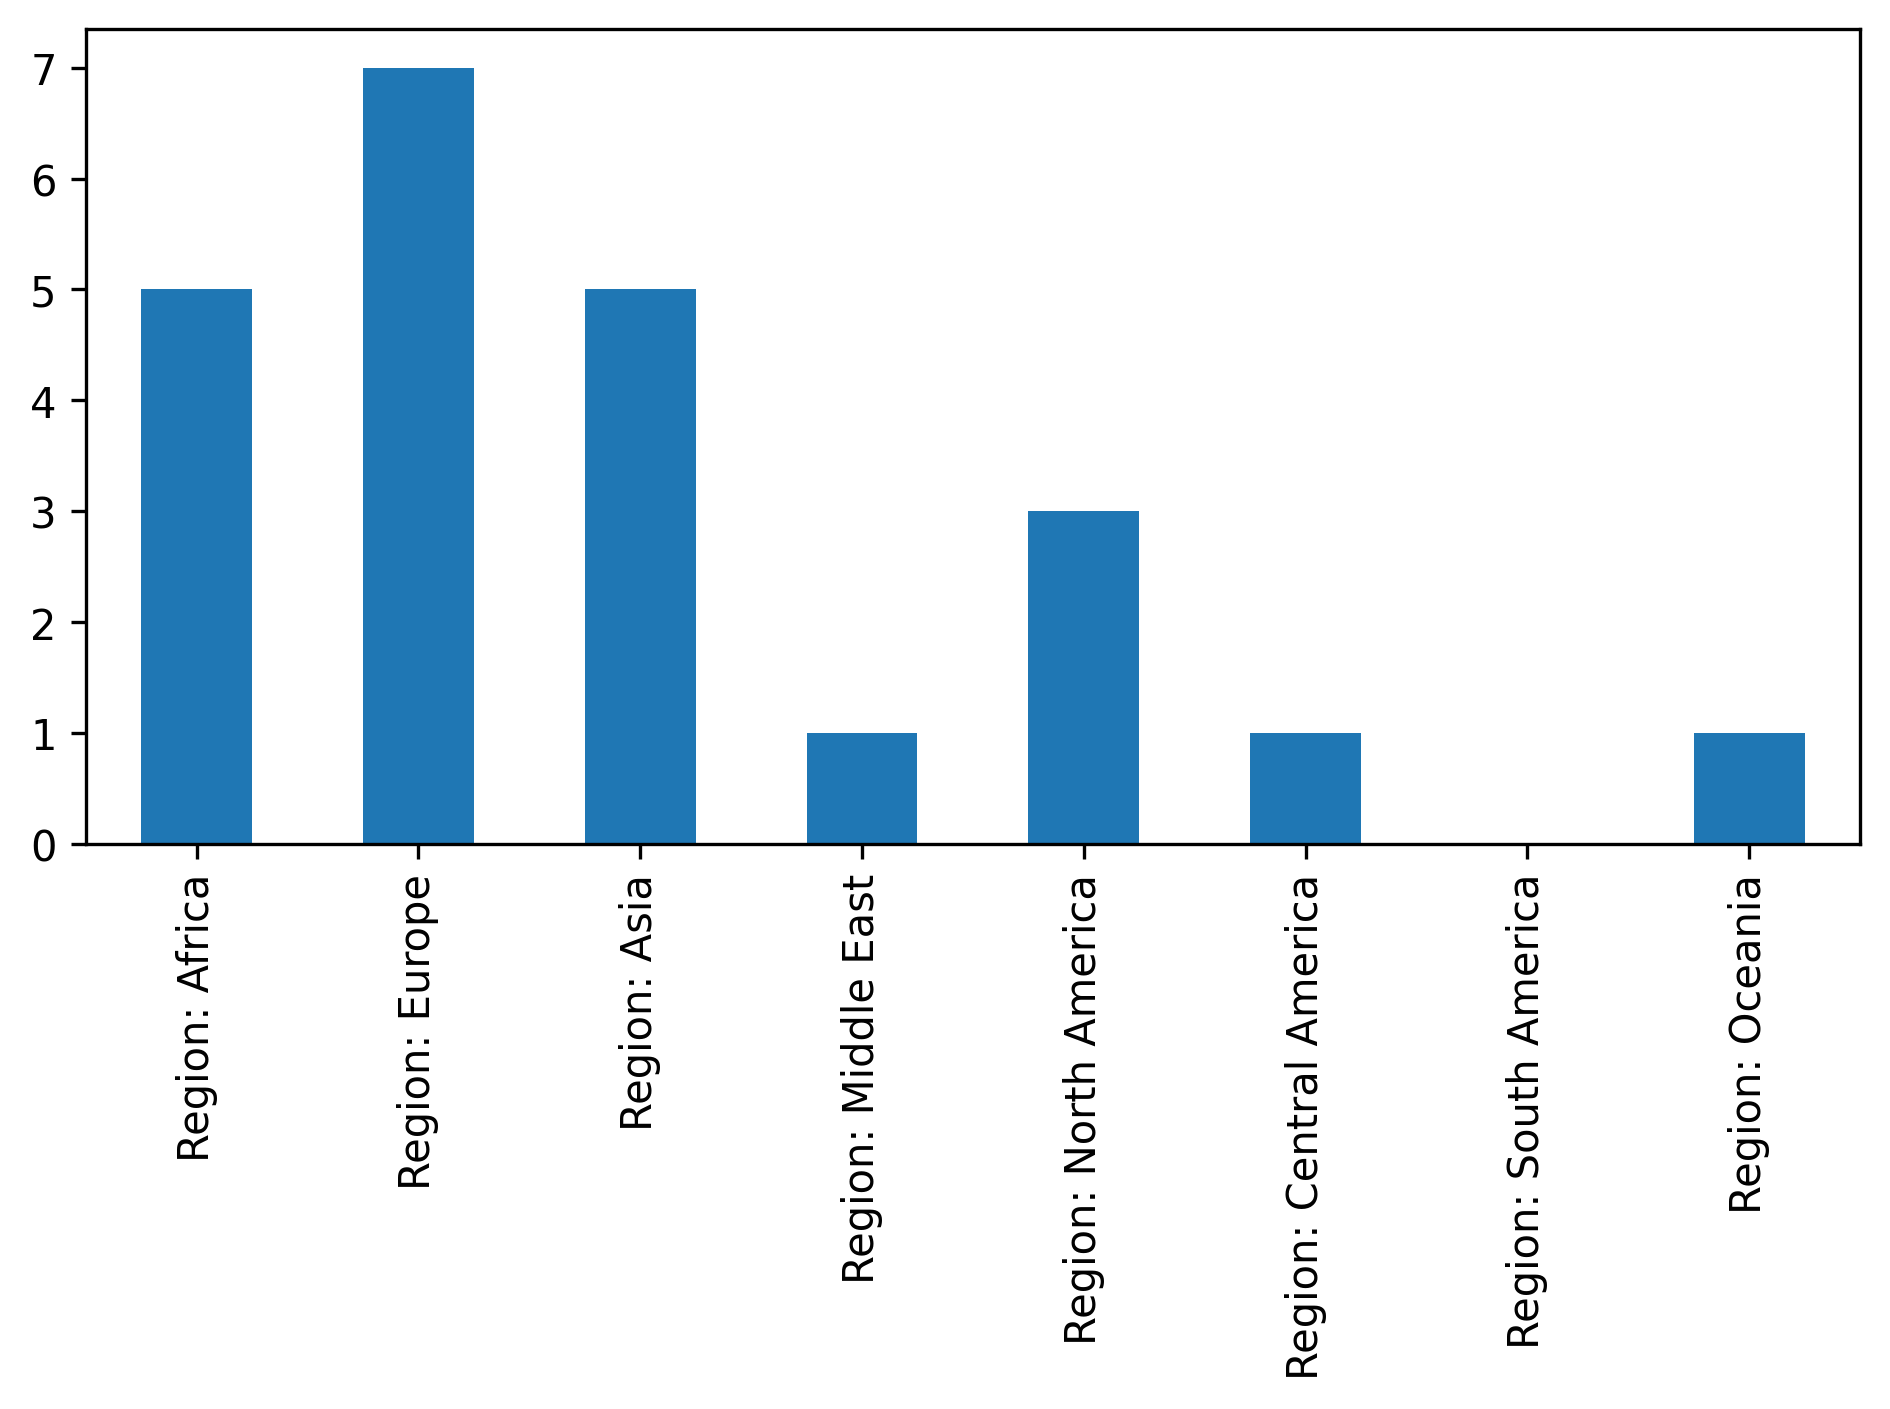

In [42]:
# Region histogram
courts_df[region_cols].sum().plot(kind='bar')

plt.tight_layout()
plt.savefig(fig_dir + 'courts_region_histogram.png')
plt.show()

In [43]:
region_courts_corr = courts_corr[courts_corr.index.str.startswith('Region:')]

In [44]:
region_courts_corr

enforcement_mechanisms_include_tribunal_court_
Region: Africa                                                 0.501703
Region: Europe                                                 0.218580
Region: Asia                                                  -0.162608
Region: Middle East                                           -0.088279
Region: North America                                         -0.147654
Region: Central America                                       -0.022110
Region: South America                                         -0.053257
Region: Oceania                                                     NaN

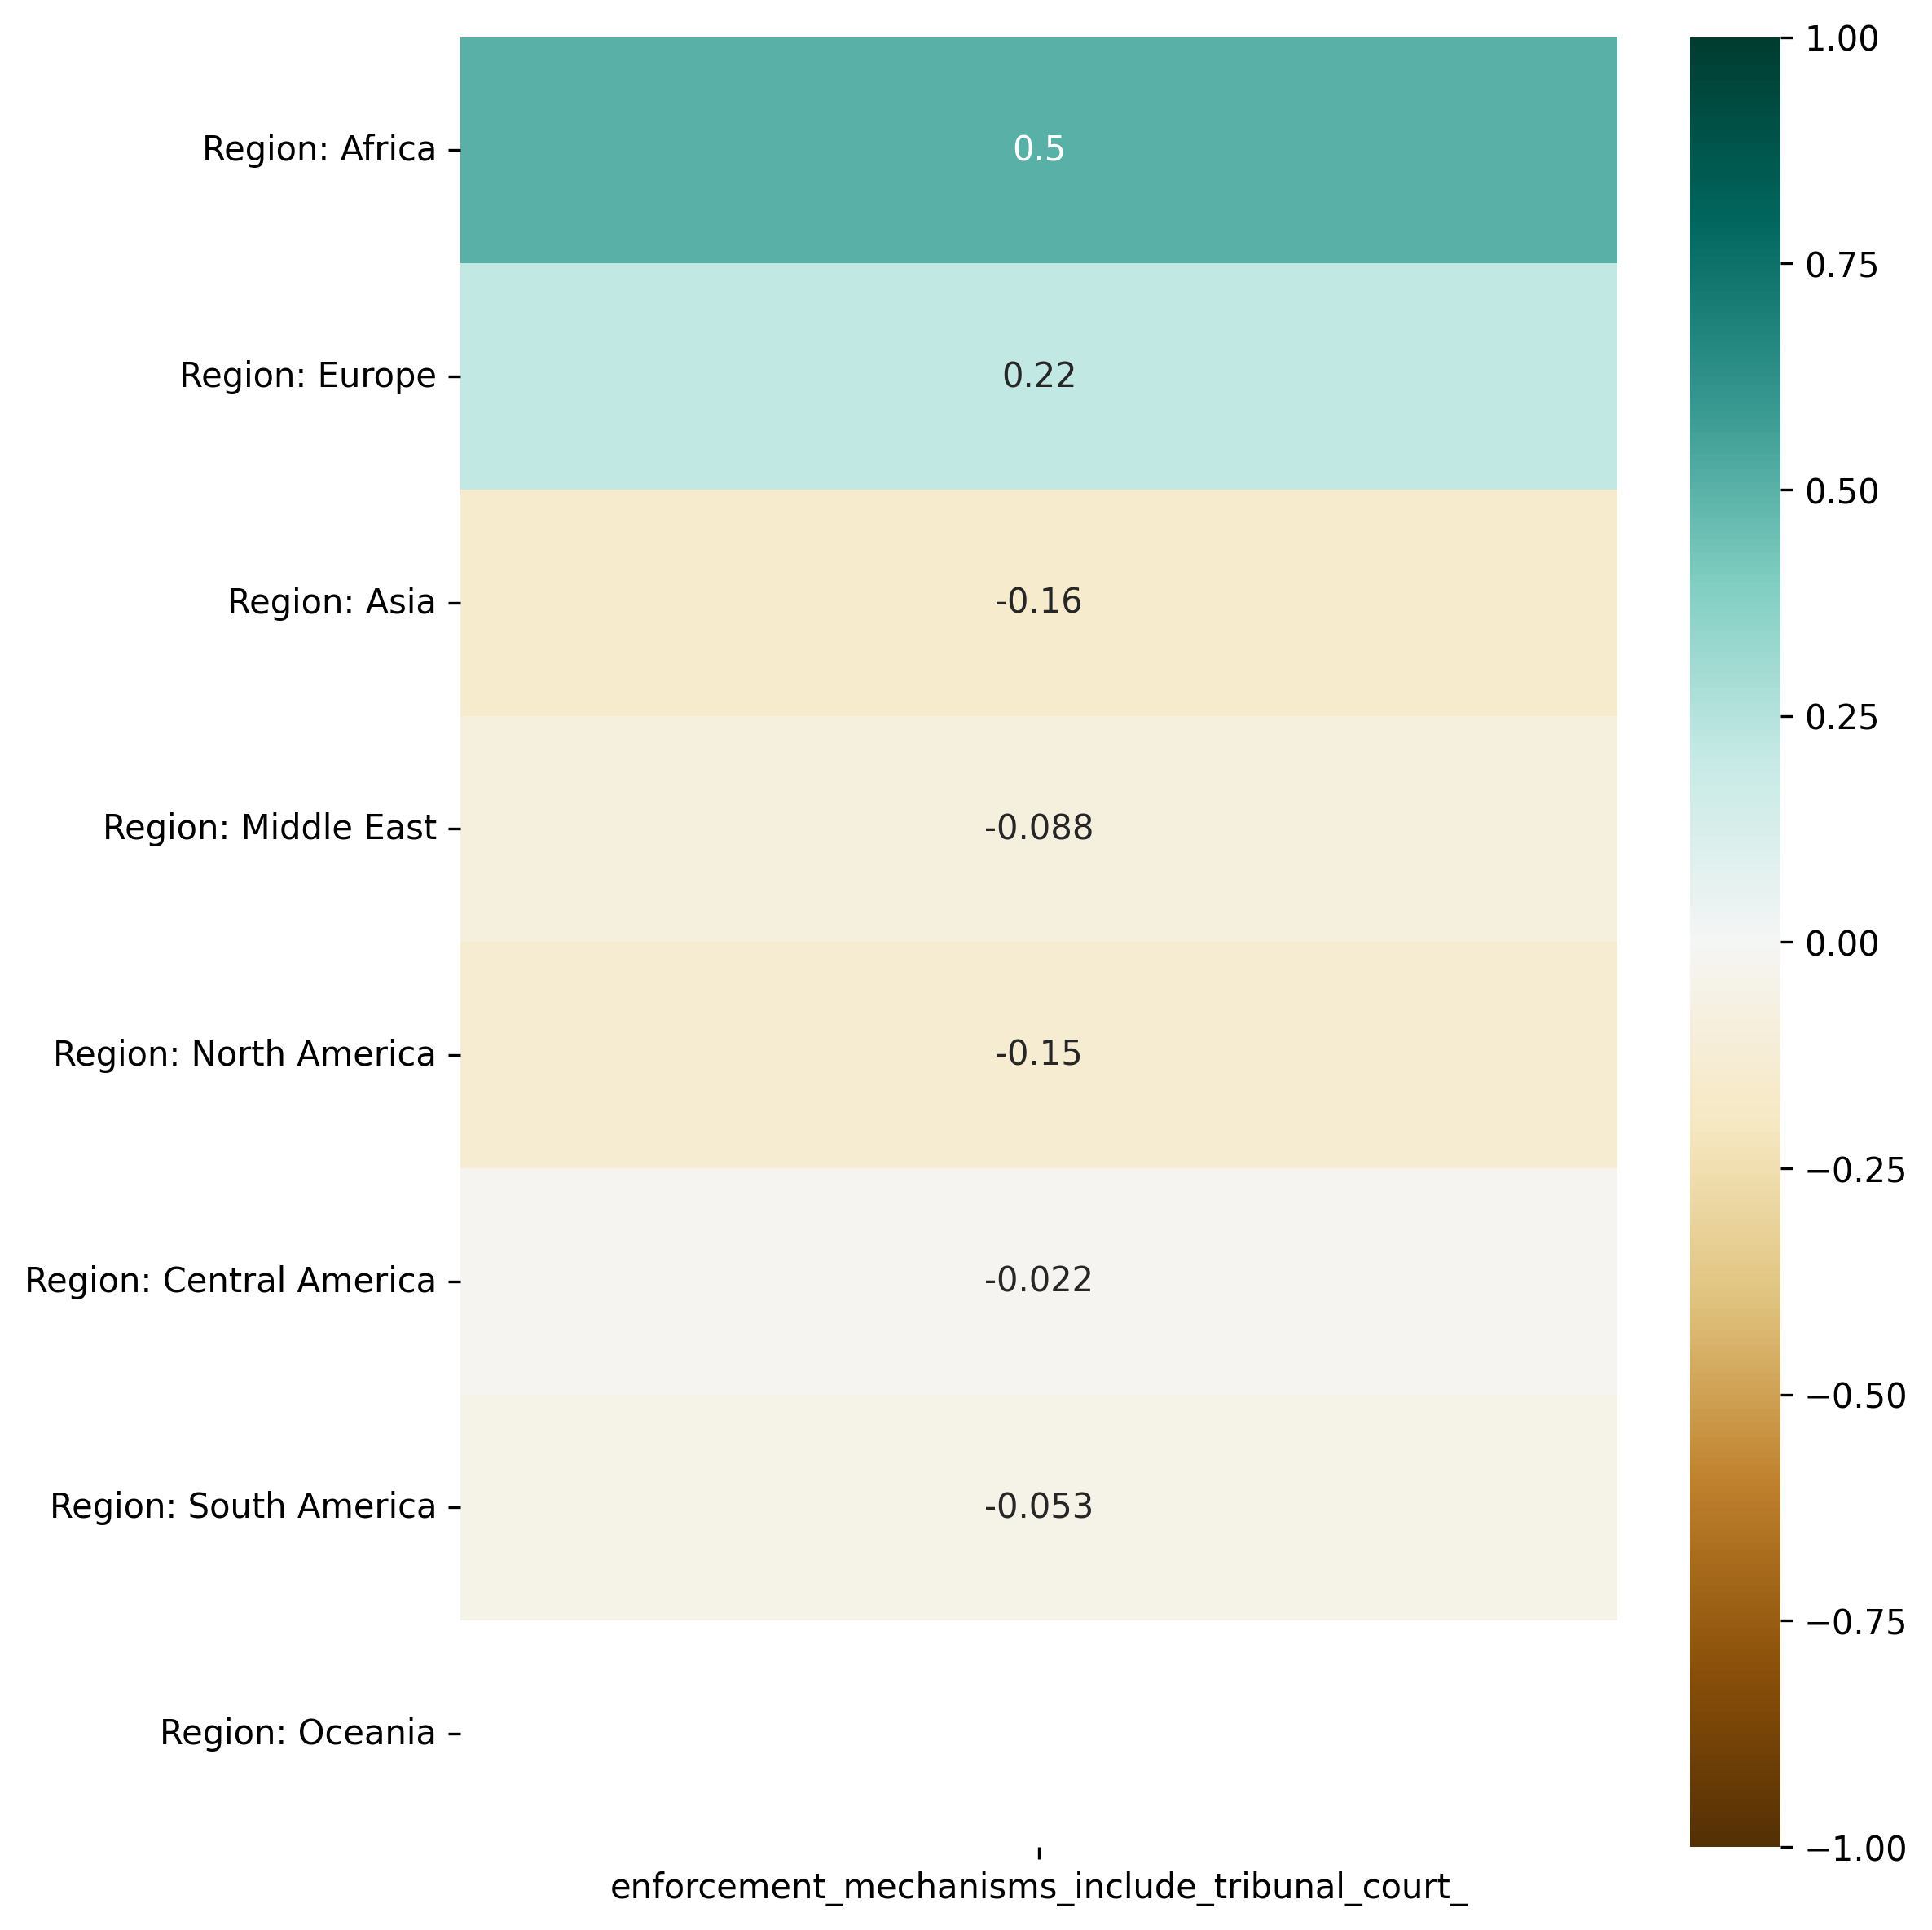

In [45]:
plt.figure(figsize=(8,8))
sns.heatmap(
    region_courts_corr, 
    annot=True,
    cmap='BrBG',
    vmin=-1,
    vmax=1
)

plt.tight_layout()
plt.savefig(fig_dir + 'courts_region_corr.png')
plt.show()

### Mapping council regions

In [46]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

worldmap.head()

/var/folders/v7/8x_7ty4j3m76hgg7tncks_kc0000gn/T/ipykernel_52021/1532259957.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


pop_est      continent                      name iso_a3  gdp_md_est  \
0     889953.0        Oceania                      Fiji    FJI        5496   
1   58005463.0         Africa                  Tanzania    TZA       63177   
2     603253.0         Africa                 W. Sahara    ESH         907   
3   37589262.0  North America                    Canada    CAN     1736425   
4  328239523.0  North America  United States of America    USA    21433226   

                                            geometry  
0  MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1  POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2  POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3  MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4  MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

In [47]:
central_america_countries = [
    'Belize',
    'Costa Rica',
    'El Salvador',
    'Guatemala',
    'Honduras',
    'Nicaragua',
    'Panama'
]

middle_east_countries = [
    'Cyprus',
    'Egypt',
    'Iran',
    'Iraq',
    'Israel',
    'Jordan',
    'Kuwait',
    'Lebanon',
    'Oman',
    'Palestine',
    'Qatar',
    'Saudi Arabia',
    'Syria',
    'Turkey',
    'United Arab Emirates',
    'Yemen'
]

# Add region for Central America
worldmap.loc[(worldmap['name'].isin(central_america_countries)), 'continent'] = 'Central America'

# Add region for Middle East
worldmap.loc[(worldmap['name'].isin(middle_east_countries)), 'continent'] = 'Middle East'

worldmap['continent'].value_counts()

continent
Africa                     50
Europe                     39
Asia                       32
Middle East                16
South America              13
North America              11
Oceania                     7
Central America             7
Seven seas (open ocean)     1
Antarctica                  1
Name: count, dtype: int64

In [48]:
region_map = gpd.GeoDataFrame(columns=['Region', 'geometry'])
regions_list = list(gov_df['Region'].unique())

In [49]:
region_map['Region'] = regions_list

region_map['geometry'].loc[region_map['Region'] == 'Africa'] = worldmap.loc[(worldmap['continent'] == 'Africa')].unary_union
region_map['geometry'].loc[region_map['Region'] == 'Europe'] = worldmap.loc[(worldmap['continent'] == 'Europe')].unary_union
region_map['geometry'].loc[region_map['Region'] == 'Asia'] = worldmap.loc[(worldmap['continent'] == 'Asia')].unary_union
region_map['geometry'].loc[region_map['Region'] == 'Middle East'] = worldmap.loc[(worldmap['continent'] == 'Middle East')].unary_union
region_map['geometry'].loc[region_map['Region'] == 'North America'] = worldmap.loc[(worldmap['continent'] == 'North America')].unary_union
region_map['geometry'].loc[region_map['Region'] == 'Central America'] = worldmap.loc[(worldmap['continent'] == 'Central America')].unary_union
region_map['geometry'].loc[region_map['Region'] == 'South America'] = worldmap.loc[(worldmap['continent'] == 'South America')].unary_union
region_map['geometry'].loc[region_map['Region'] == 'Oceania'] = worldmap.loc[(worldmap['continent'] == 'Oceania')].unary_union

region_map

Region                                           geometry
0           Europe  MULTIPOLYGON (((-53.555 2.335, -53.779 2.377, ...
1             Asia  MULTIPOLYGON (((105.857 -4.306, 105.818 -5.852...
2      Middle East  MULTIPOLYGON (((25.000 25.682, 25.000 29.239, ...
3  Central America  POLYGON ((-77.243 7.935, -77.431 7.638, -77.75...
4           Africa  MULTIPOLYGON (((-11.439 6.786, -11.708 6.860, ...
5    North America  MULTIPOLYGON (((-155.222 19.240, -155.542 19.0...
6    South America  MULTIPOLYGON (((-68.640 -55.580, -69.232 -55.4...
7          Oceania  MULTIPOLYGON (((147.914 -43.212, 147.565 -42.9...

#### All Councils

In [50]:
courts_region_map = region_map

In [51]:
courts_region_counts = courts_df['Region'].value_counts().rename_axis('Region').reset_index(name='Count')

In [52]:
courts_region_counts

Region  Count
0           Europe      7
1           Africa      5
2             Asia      5
3    North America      3
4      Middle East      1
5  Central America      1
6          Oceania      1

In [53]:
# Custom: Add empty regions
missing_regions_df = pd.DataFrame([['South America', 0],['North America', 0]], columns=['Region', 'Count'])
missing_regions_df

Region  Count
0  South America      0
1  North America      0

In [54]:
# Custom: Add empty regions
courts_region_counts = pd.concat([courts_region_counts, missing_regions_df])
courts_region_counts

Region  Count
0           Europe      7
1           Africa      5
2             Asia      5
3    North America      3
4      Middle East      1
5  Central America      1
6          Oceania      1
0    South America      0
1    North America      0

In [55]:
all_merged_regions = pd.merge(courts_region_map, courts_region_counts, on='Region')

In [56]:
all_merged_regions

Region                                           geometry  Count
0           Europe  MULTIPOLYGON (((-53.555 2.335, -53.779 2.377, ...      7
1             Asia  MULTIPOLYGON (((105.857 -4.306, 105.818 -5.852...      5
2      Middle East  MULTIPOLYGON (((25.000 25.682, 25.000 29.239, ...      1
3  Central America  POLYGON ((-77.243 7.935, -77.431 7.638, -77.75...      1
4           Africa  MULTIPOLYGON (((-11.439 6.786, -11.708 6.860, ...      5
5    North America  MULTIPOLYGON (((-155.222 19.240, -155.542 19.0...      3
6    North America  MULTIPOLYGON (((-155.222 19.240, -155.542 19.0...      0
7    South America  MULTIPOLYGON (((-68.640 -55.580, -69.232 -55.4...      0
8          Oceania  MULTIPOLYGON (((147.914 -43.212, 147.565 -42.9...      1

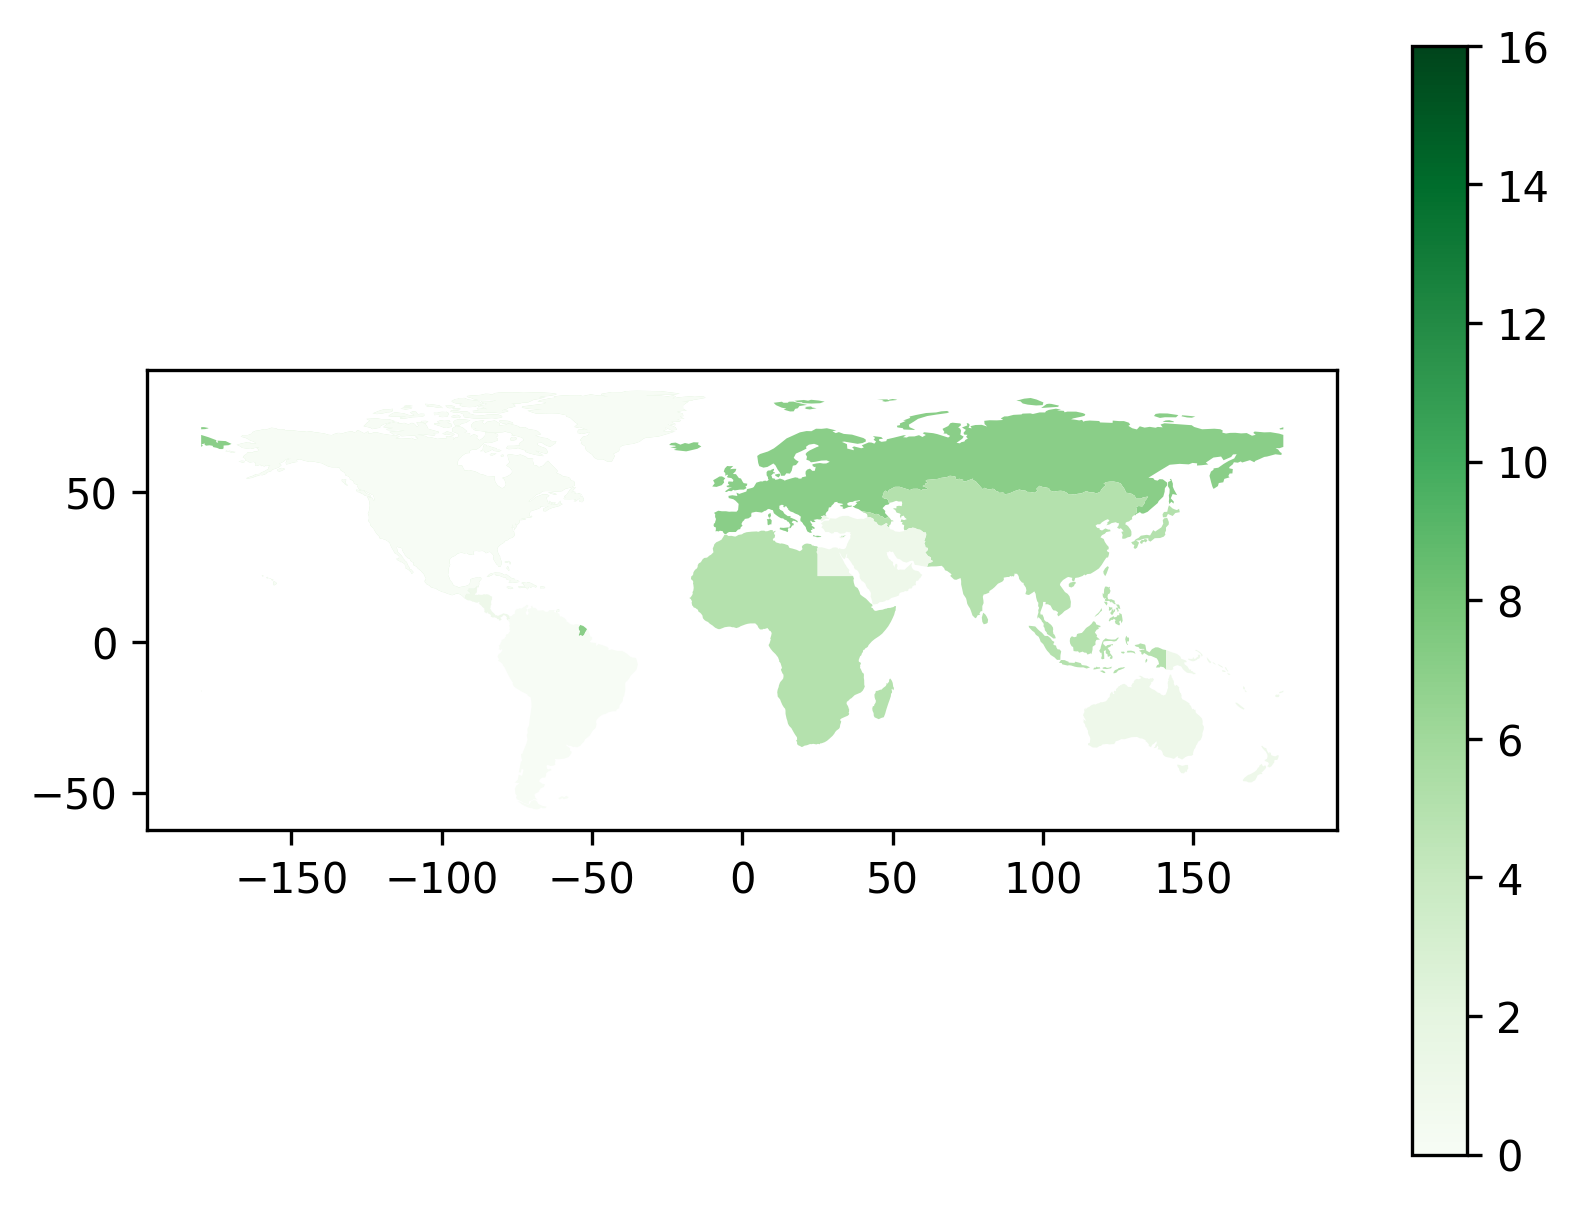

In [57]:
all_merged_regions.plot(
    column='Count', 
    legend=True,
    cmap='Greens',
    vmin=0,
    vmax=16
)

plt.savefig(fig_dir + 'map_courts_all.png')
plt.show()

## Courts Analysis: Timeline 

In [58]:
courts_dates_df = courts_df[['Time span: Start', 'Time span: Duration', 'Name'] + court_col]

In [59]:
courts_dates_df

Time span: Start  Time span: Duration                        Name  \
4            -1920.0                120.0                       Assur   
5             -508.0                186.0   Athens (Classical Period)   
8             -400.0                300.0                    Carthage   
13             900.0                300.0  Communes (Medieval Europe)   
16           -2700.0               1700.0                      Egypt    
17             400.0                700.0       England (Anglo Saxon)   
22            -480.0                453.0           Greek oligarchies   
26             930.0                332.0                    Iceland    
27             900.0                660.0                 Igbo People   
34            1800.0                100.0               Kachin gumlao   
36            1900.0                123.0        Kung San (Ju/hoansi)   
41            1800.0                100.0                 Minangkabau   
59           -1894.0                299.0                      Sippar   
60            1300.0                500.0                 Switzerland   
62            1100.0                500.0                    Tlaxcala   
72               NaN                  NaN                  Gilbertese   
73               NaN                  NaN                        Toda   
74               NaN                  NaN                  Nicobarese   
75               NaN                  NaN              Gilyak (Nivkh)   
76               NaN                  NaN                        Nama   
81               NaN                  NaN        Ingalik [Deg Xit'an]   
82               NaN                  NaN                     Kutenai   
83               NaN                  NaN            Micmac [Mi'kmaq]   

    enforcement_mechanisms_include_tribunal_court_  
4                                                1  
5                                                1  
8                                                1  
13                                               1  
16                                               1  
17                                               1  
22                                               1  
26                                               1  
27                                               1  
34                                               1  
36                                               1  
41                                               1  
59                                               1  
60                                               1  
62                                               1  
72                                               1  
73                                               1  
74                                               1  
75                                               1  
76                                               1  
81                                               1  
82                                               1  
83                                               1

In [60]:
courts_dates_tuples = [tuple(x) for x in courts_dates_df.to_numpy()]
courts_dates_tuples

[(-1920.0, 120.0, 'Assur', 1),
 (-508.0, 186.0, 'Athens (Classical Period)', 1),
 (-400.0, 300.0, 'Carthage', 1),
 (900.0, 300.0, 'Communes (Medieval Europe)', 1),
 (-2700.0, 1700.0, 'Egypt ', 1),
 (400.0, 700.0, 'England (Anglo Saxon)', 1),
 (-480.0, 453.0, 'Greek oligarchies', 1),
 (930.0, 332.0, 'Iceland ', 1),
 (900.0, 660.0, 'Igbo People', 1),
 (1800.0, 100.0, 'Kachin gumlao', 1),
 (1900.0, 123.0, 'Kung San (Ju/hoansi)', 1),
 (1800.0, 100.0, 'Minangkabau', 1),
 (-1894.0, 299.0, 'Sippar', 1),
 (1300.0, 500.0, 'Switzerland', 1),
 (1100.0, 500.0, 'Tlaxcala', 1),
 (nan, nan, 'Gilbertese', 1),
 (nan, nan, 'Toda', 1),
 (nan, nan, 'Nicobarese', 1),
 (nan, nan, 'Gilyak (Nivkh)', 1),
 (nan, nan, 'Nama', 1),
 (nan, nan, "Ingalik [Deg Xit'an]", 1),
 (nan, nan, 'Kutenai', 1),
 (nan, nan, "Micmac [Mi'kmaq]", 1)]

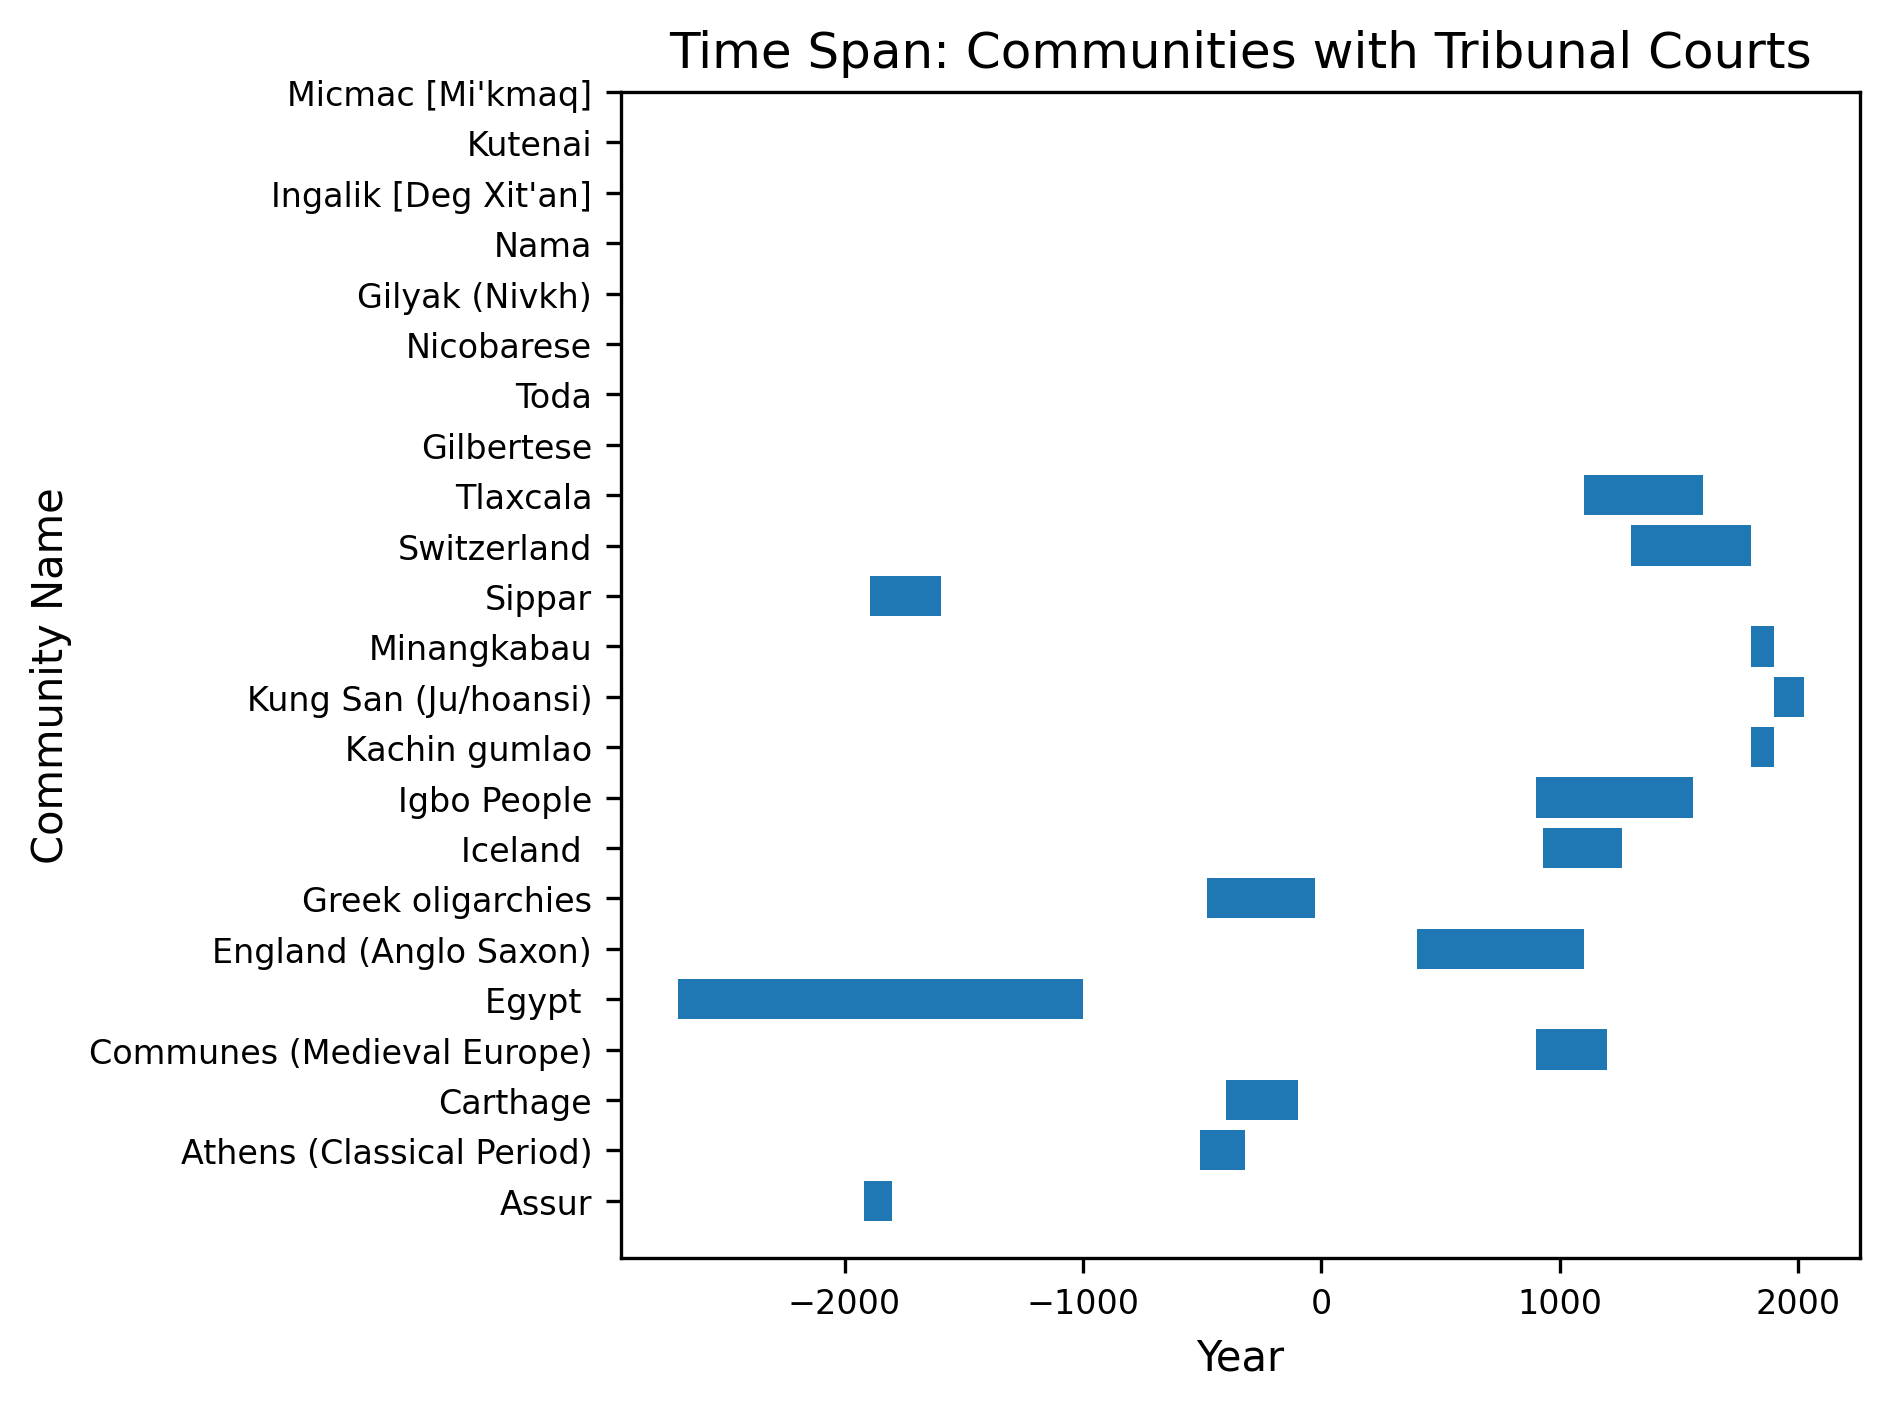

In [61]:
# create figure and plot
fig, ax = plt.subplots()
labels = []
for i, (
    start, 
    duration, 
    label, 
    has_courts,
) in enumerate(courts_dates_tuples):
    # bar_color = 'blue'
    
    labels.append(label)
    ax.broken_barh(
        [(start, duration)], 
        (i-0.4,0.8),
        # color=bar_color
    )
    
# set yticks at the middle of the bars
ax.set_yticks(range(len(courts_dates_tuples)))
ax.set_yticklabels(labels)
ax.tick_params(axis='both', which='major', labelsize=8)

ax.set_xlabel('Year')
ax.set_ylabel('Community Name')

plt.title('Time Span: Communities with Tribunal Courts')
# plt.figure(figsize=(80, 80))

plt.tight_layout()
plt.savefig(fig_dir + 'timeline_courts.png')
plt.show()